In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
r2_output_path = "Results/report_combined_r2_results.csv"
spearman_output_path = "Results/report_combined_spearman_results.csv"

r2_results = pd.read_csv(r2_output_path)
spearman_results = pd.read_csv(spearman_output_path)

In [102]:
import numpy as np
from typing import Tuple, Sequence
import math
import random

def mean_r2_spearman(path: str, reps: int = 5000, alpha: float = 0.05, seed: int = 42):
    """
    Reads a whitespace-delimited file with columns:
        BIO_ID R2_Coefficient Spearman_Coefficient
    Skips comment lines (#) and header line starting with BIO_ID.

    Computes mean R2 and Spearman across variables and a bootstrap (1-alpha)
    percentile confidence interval for each by resampling variables with replacement.

    Parameters
    ----------
    path : str
        Path to input file.
    reps : int, default 5000
        Number of bootstrap replicates.
    alpha : float, default 0.05
        Significance level (two-sided). 0.05 -> 95% CI.
    seed : int, default 42
        PRNG seed for reproducibility.

    Returns
    -------
    (mean_r2, mean_spearman, r2_ci_low, r2_ci_high, s_ci_low, s_ci_high, n)
        mean_* : float  Means across variables.
        *_ci_* : float  Bootstrap percentile confidence interval bounds.
        n : int  Number of variables parsed.

    Notes
    -----
    The bootstrap treats variables as exchangeable observations. If variables are highly
    correlated, the CI may be anti-conservative (too narrow). Consider reporting this
    caveat in accompanying text if correlation is substantial.
    """
    r2_values = []
    s_values = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):
                continue
            parts = line.split()
            if parts[0] == "BIO_ID":
                continue  # skip header
            try:
                r2 = float(parts[1])
                sp = float(parts[2])
            except (IndexError, ValueError):
                continue
            r2_values.append(r2)
            s_values.append(sp)
    n = len(r2_values)
    if n == 0:
        return (math.nan, math.nan, math.nan, math.nan, math.nan, math.nan, 0)
    r2_arr = np.array(r2_values, dtype=float)
    s_arr = np.array(s_values, dtype=float)
    mean_r2 = float(r2_arr.mean())
    mean_s = float(s_arr.mean())
    # Bootstrap percentile CIs
    rng = np.random.default_rng(seed)
    r2_boot = np.empty(reps, dtype=float)
    s_boot = np.empty(reps, dtype=float)
    for i in range(reps):
        idx = rng.integers(0, n, n)  # resample indices with replacement
        r2_boot[i] = r2_arr[idx].mean()
        s_boot[i] = s_arr[idx].mean()
    lower_q = alpha / 2.0
    upper_q = 1.0 - lower_q
    r2_ci_low, r2_ci_high = np.quantile(r2_boot, [lower_q, upper_q])
    s_ci_low, s_ci_high = np.quantile(s_boot, [lower_q, upper_q])
    return mean_r2, mean_s, float(r2_ci_low), float(r2_ci_high), float(s_ci_low), float(s_ci_high), n

In [103]:
results_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/Report/avg_calc.txt"
mean_r2, mean_spearman, r2_ci_low, r2_ci_high, s_ci_low, s_ci_high, n = mean_r2_spearman(results_path)

print(f"N variables: {n}")
print(f"Mean R²: {mean_r2:.3f} (bootstrap {95}% CI [{r2_ci_low:.3f}, {r2_ci_high:.3f}])")
print(f"Mean Spearman: {mean_spearman:.3f} (bootstrap {95}% CI [{s_ci_low:.3f}, {s_ci_high:.3f}])")
print("Note: CI assumes variables are exchangeable; correlation among variables can narrow true uncertainty.")

N variables: 18
Mean R²: 0.442 (bootstrap 95% CI [0.356, 0.526])
Mean Spearman: 0.651 (bootstrap 95% CI [0.578, 0.722])
Note: CI assumes variables are exchangeable; correlation among variables can narrow true uncertainty.


In [104]:
results_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/Report/avg_calc.txt"
mean_r2, mean_spearman, r2_ci_low, r2_ci_high, s_ci_low, s_ci_high, n = mean_r2_spearman(results_path, reps=10000)  # higher reps for stability

print(f"N variables: {n}")
print(f"Mean R²: {mean_r2:.3f} (bootstrap 95% CI [{r2_ci_low:.3f}, {r2_ci_high:.3f}])")
print(f"Mean Spearman: {mean_spearman:.3f} (bootstrap 95% CI [{s_ci_low:.3f}, {s_ci_high:.3f}])")

N variables: 18
Mean R²: 0.442 (bootstrap 95% CI [0.356, 0.526])
Mean Spearman: 0.651 (bootstrap 95% CI [0.578, 0.722])


In [105]:
# def mean_r2_spearman(path: str):
#     """
#     Reads a file with columns: BIO_ID R2_Coefficient Spearman_Coefficient
#     Returns (mean_r2, mean_spearman).
#     """
#     r2_sum = 0.0
#     s_sum = 0.0
#     n = 0
#     with open(path, "r", encoding="utf-8") as f:
#         for line in f:
#             line = line.strip()
#             if not line or line.startswith("#"):
#                 continue
#             parts = line.split()
#             if parts[0] == "BIO_ID":
#                 continue  # skip header
#             try:
#                 r2 = float(parts[1])
#                 sp = float(parts[2])
#             except (IndexError, ValueError):
#                 continue
#             r2_sum += r2
#             s_sum += sp
#             n += 1
#     return (r2_sum / n if n else float("nan"),
#             s_sum / n if n else float("nan"))
# ax.set_xticks(x)
# ax.set_xticklabels(xticklabels, rotation=45, ha='right')
# ax.set_ylabel('Mean score')
# ax.set_title('Model performance (mean across variables)')
# # move legend outside plot to the upper-right and increase right margin to avoid overlap
# ax.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
# # plt.tight_layout(rect=[0, 0, 0.82, 1])  # leave space on the right for the legend

# plt.show()

# # also produce a small table for exact numbers
# summary_df = pd.DataFrame({
#     'R2_mean': mean_r2.round(3),
#     'R2_sem': sem_r2.round(3),
#     'Spearman_mean': mean_s.round(3),
#     'Spearman_sem': sem_s.round(3)
# })
# print(summary_df)

/tmp/ipykernel_2498/1684776773.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = long_df.groupby(['SNPs','Metric'])['Score'].mean().unstack('Metric')


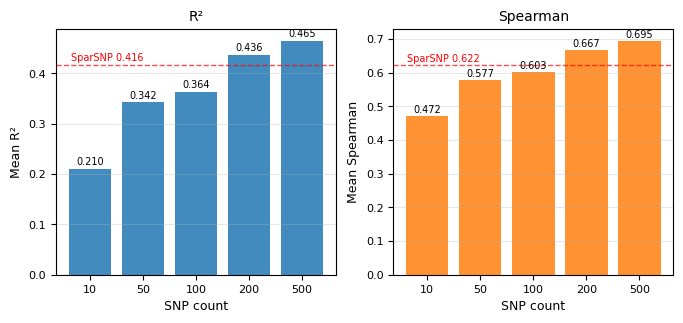

Summary (means): window 1000 bp, max pooling
  SNPs=10: R² = 0.210 | Spearman = 0.472 (n=18)
  SNPs=50: R² = 0.342 | Spearman = 0.577 (n=18)
  SNPs=100: R² = 0.364 | Spearman = 0.603 (n=18)
  SNPs=200: R² = 0.436 | Spearman = 0.667 (n=18)
  SNPs=500: R² = 0.465 | Spearman = 0.695 (n=18)


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load combined size-test results
size_r2_path = "Results/combined_size_test_r2.csv"
size_s_path  = "Results/combined_size_test_spearman.csv"
size_r2 = pd.read_csv(size_r2_path)
size_s  = pd.read_csv(size_s_path)

# SparSNP baseline (all SNPs model) for reference
sparsnp_r2 = 0.416
sparsnp_spearman = 0.622

# Parse columns like SNPs50_1000_max or AllSNPs_1000_max (single pooling: max)
pattern = re.compile(r"^(SNPs(\d+)|(AllSNPs|RandSNPs))_(\d+)_(max)$")
col_meta = []
for col in size_r2.columns:
    if col == 'BIO_ID':
        continue
    m = pattern.match(col)
    if not m:
        continue
    snps_num = m.group(2)
    snp_label = ('All' if snps_num is None else str(int(snps_num)))
    window = int(m.group(4))
    pooling = m.group(5)
    col_meta.append({'col': col,'SNPs': snp_label,'Window': window,'Pooling': pooling})

meta_df = pd.DataFrame(col_meta)
if meta_df.empty:
    raise ValueError("No matching columns found in combined_size_test_r2.csv (expected SNPs<N>_1000_max or AllSNPs/RandSNPs_1000_max).")

# Restrict to a single window (prefer 1000bp) and max pooling
wins = sorted(meta_df['Window'].unique())
target_window = 1000 if 1000 in set(wins) else wins[0]
meta_df = meta_df[(meta_df['Window'] == target_window) & (meta_df['Pooling'] == 'max')]

# Build long-form dataframe with per-variable scores
records = []
for _, row in meta_df.iterrows():
    col = row['col']
    snp_label = row['SNPs']
    # R² values
    for v in size_r2[col].dropna().values:
        records.append({'SNPs': snp_label, 'Metric': 'R2', 'Score': v})
    # Spearman values
    for v in size_s[col].dropna().values:
        records.append({'SNPs': snp_label, 'Metric': 'Spearman', 'Score': v})

long_df = pd.DataFrame(records)

# Determine category order (ascending numeric, followed by "All")
numeric_snps = [lbl for lbl in long_df['SNPs'].unique() if lbl != 'All']
numeric_snps.sort(key=int)
order_labels = numeric_snps + ['All']
long_df['SNPs'] = pd.Categorical(long_df['SNPs'], categories=order_labels, ordered=True)

# Faceted box plots: one subplot for R², one for Spearman
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# --- R² ---
r2_df = long_df[long_df['Metric'] == 'R2']
sns.boxplot(data=r2_df, x='SNPs', y='Score', ax=axes[0], palette='Set2')
axes[0].axhline(sparsnp_r2, color='darkred', linestyle='--', linewidth=1.5, label=f'SparSNP = {sparsnp_r2:.3f}')
axes[0].set_title('R² by SNP Count (1000bp window, max pooling)')
axes[0].set_xlabel('Number of SNPs')
axes[0].set_ylabel('R² Coefficient')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# --- Spearman ---
s_df = long_df[long_df['Metric'] == 'Spearman']
sns.boxplot(data=s_df, x='SNPs', y='Score', ax=axes[1], palette='Set2')
axes[1].axhline(sparsnp_spearman, color='darkred', linestyle='--', linewidth=1.5, label=f'SparSNP = {sparsnp_spearman:.3f}')
axes[1].set_title('Spearman by SNP Count (1000bp window, max pooling)')
axes[1].set_xlabel('Number of SNPs')
axes[1].set_ylabel('Spearman Coefficient')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary by SNP Count:")
for lbl in order_labels:
    r2_vals = long_df[(long_df['SNPs']==lbl) & (long_df['Metric']=='R2')]['Score']
    s_vals  = long_df[(long_df['SNPs']==lbl) & (long_df['Metric']=='Spearman')]['Score']
    print(f"  SNPs={lbl}: R² = {r2_vals.mean():.3f} | Spearman = {s_vals.mean():.3f} (n={len(r2_vals)})")

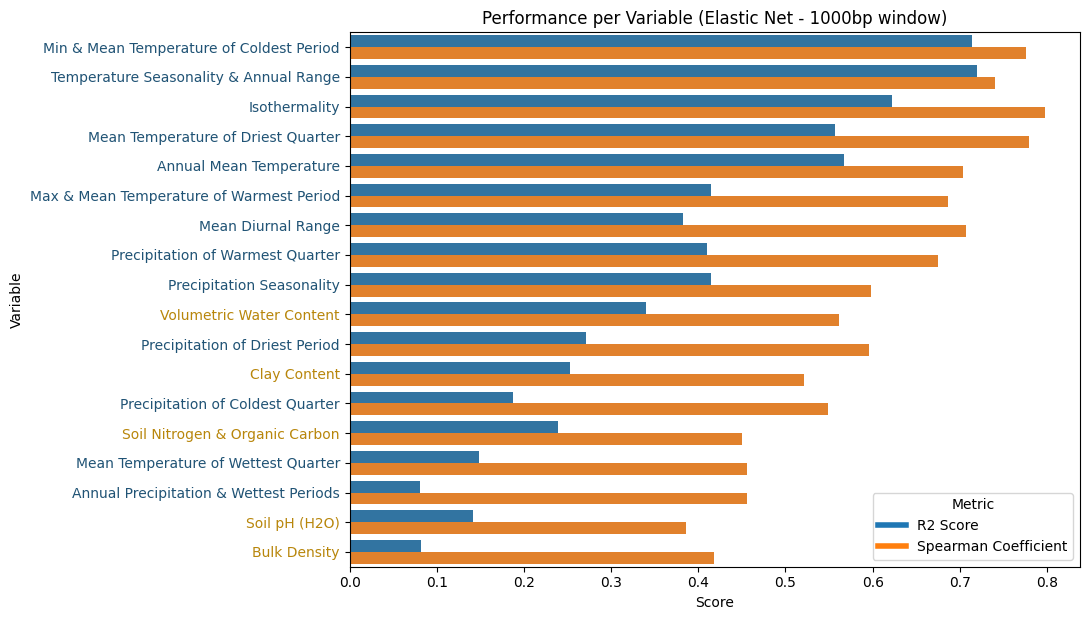

In [5]:
import seaborn as sns

soil_name_map = {
    "wv0033_mean": "Volumetric Water Content",
    "clay_mean": "Clay Content",
    "bdod_mean": "Bulk Density",
    "phh2o_mean": "Soil pH (H2O)",
    "soc_mean": "Soil Organic Carbon",
    "nitrogen_mean": "Soil Nitrogen Content",
    "Soil_Nitrogen_SOC": "Soil Nitrogen & Organic Carbon"
}

bio_name_map = {
    "BIO1": "Annual Mean Temperature",
    "BIO2": "Mean Diurnal Range",
    "BIO3": "Isothermality",
    "BIO4": "Temperature Seasonality",
    "BIO5": "Max Temperature of Warmest Month",
    "BIO6": "Min Temperature of Coldest Month",
    "BIO7": "Temperature Annual Range",
    "BIO8": "Mean Temperature of Wettest Quarter",
    "BIO9": "Mean Temperature of Driest Quarter",
    "BIO10": "Mean Temperature of Warmest Quarter",
    "BIO11": "Mean Temperature of Coldest Quarter",
    "BIO12": "Annual Precipitation",
    "BIO13": "Precipitation of Wettest Month",
    "BIO14": "Precipitation of Driest Month",
    "BIO15": "Precipitation Seasonality",
    "BIO16": "Precipitation of Wettest Quarter",
    "BIO17": "Precipitation of Driest Quarter",
    "BIO18": "Precipitation of Warmest Quarter",
    "BIO19": "Precipitation of Coldest Quarter",
    "BIO_11_6": "Min & Mean Temperature of Coldest Period",
    "BIO_4_7": "Temperature Seasonality & Annual Range",
    "BIO_10_5":    "Max & Mean Temperature of Warmest Period",
    "BIO_14_17":   "Precipitation of Driest Period",
    "BIO_12_13_16": "Annual Precipitation & Wettest Periods"
}

def prettify_bio_id(bio_id):
    if bio_id in soil_name_map:
        return soil_name_map[bio_id]
    if bio_id in bio_name_map:
        return bio_name_map[bio_id]
    return bio_id

def plot_single_result(input_path, sort_by='mean', show=True):
    df = pd.read_csv(input_path, sep=r'\s+')
    required = {'BIO_ID', 'R2_Coefficient', 'Spearman_Coefficient'}
    if not required.issubset(df.columns):
        raise ValueError(f"Input must contain columns: {required}")

    df['Variable_Name'] = df['BIO_ID'].apply(prettify_bio_id)
    if sort_by == 'R2':
        df = df.sort_values('R2_Coefficient', ascending=False)
    else:
        df['Mean_Score'] = df[['R2_Coefficient', 'Spearman_Coefficient']].mean(axis=1)
        df = df.sort_values('Mean_Score', ascending=False)

    plot_df = df.melt(
        id_vars=['BIO_ID', 'Variable_Name'],
        value_vars=['R2_Coefficient', 'Spearman_Coefficient'],
        var_name='Metric',
        value_name='Score'
    )

    ordered_vars = list(df['Variable_Name'])
    plot_df['Variable_Name'] = pd.Categorical(plot_df['Variable_Name'], categories=ordered_vars, ordered=True)

    metric_palette = {
        'R2_Coefficient': '#1f77b4',
        'Spearman_Coefficient': '#ff7f0e'
    }

    height = max(6, 0.35 * len(ordered_vars))
    plt.figure(figsize=(11, height))
    ax = sns.barplot(
        x='Score', y='Variable_Name',
        hue='Metric', data=plot_df,
        palette=metric_palette, dodge=True
    )

    for label in ax.get_yticklabels():
        txt = label.get_text()
        if txt in soil_name_map.values():
            label.set_color("#B8860B")
        else:
            label.set_color("#205375")

    ax.set_xlabel("Score")
    ax.set_ylabel("Variable")
    title_name = input_path.split("/")[-1]
    ax.set_title(f"Performance per Variable (Elastic Net - 1000bp window)")
    ax.legend(title="Metric", loc='lower right', handles=[
        plt.Line2D([0], [0], color=metric_palette['R2_Coefficient'], lw=4, label='R2 Score'),
        plt.Line2D([0], [0], color=metric_palette['Spearman_Coefficient'], lw=4, label='Spearman Coefficient')
    ])
    plt.tight_layout()

    if show:
        plt.show()

# Example usage (add or change path as needed)
plot_single_result("/home/andrazzrimsek/DataM/WorldClim/Datasets/SeqLenNorm/regression_1000_59939928/results_Caduceus_FixedLen_1000.txt")

/tmp/ipykernel_2498/1575261864.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


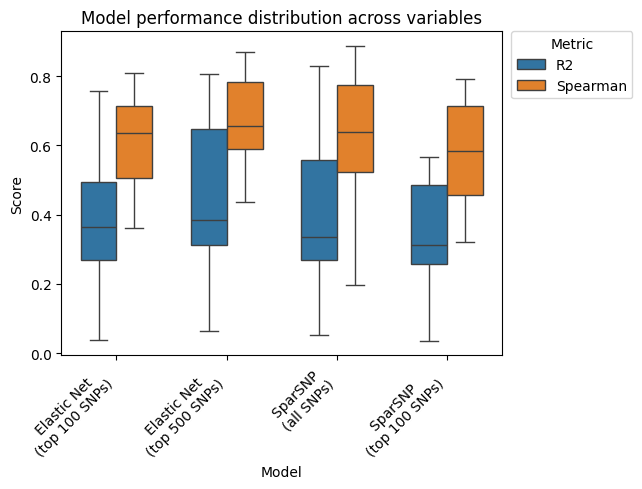

               R2_mean  R2_sem  Spearman_mean  Spearman_sem
ElasticNet       0.387   0.046          0.619         0.031
ElasticNet500    0.449   0.050          0.682         0.029
SparSNP_Base     0.416   0.056          0.622         0.046
SparSNP_100      0.348   0.039          0.585         0.036


In [108]:
r2_output_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/report_sparsnp_combined_r2_results.csv"
spearman_output_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/report_sparsnp_combined_spearman_results.csv"
# r2_output_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/report_combined_r2_results.csv"
# spearman_output_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/report_combined_spearman_results.csv"

r2_results = pd.read_csv(r2_output_path)
spearman_results = pd.read_csv(spearman_output_path)

# models from your combined tables (exclude BIO_ID and Average)
models = [c for c in r2_results.columns if c not in ['BIO_ID','Average']]

# map models to pretty x-axis labels
pretty_map = {
    "SparSNP_Base": "SparSNP \n(all SNPs)",
    "SparSNP_100": "SparSNP     \n(top 100 SNPs)",
    "ElasticNet": "Elastic Net   \n(top 100 SNPs)",
    "ElasticNet500": "Elastic Net   \n(top 500 SNPs)",
}
xticklabels = [pretty_map.get(m, m) for m in models]

# compute means and SEMs across variables (retain for summary table)
mean_r2 = r2_results[models].mean()
sem_r2 = r2_results[models].sem()
mean_s = spearman_results[models].mean()
sem_s = spearman_results[models].sem()

# ------------------------------------------------------------------
# Replace previous grouped bar plot with box plot to show distributions
# ------------------------------------------------------------------
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Build long-form dataframe with per-variable scores for each model & metric
records = []
for m in models:
    # R2 distribution
    for v in r2_results[m].dropna().values:
        records.append({"Model": m, "Metric": "R2", "Score": v})
    # Spearman distribution
    if m in spearman_results.columns:
        for v in spearman_results[m].dropna().values:
            records.append({"Model": m, "Metric": "Spearman", "Score": v})

dist_df = pd.DataFrame(records)

# Order models
dist_df['Model'] = pd.Categorical(dist_df['Model'], categories=models, ordered=True)

fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=dist_df, x='Model', y='Score', hue='Metric', ax=ax,
            palette={'R2': '#1f77b4', 'Spearman': '#ff7f0e'},
            showfliers=False, width=0.65)

# Optional: overlay individual points (light) for additional distribution insight
# sns.stripplot(data=dist_df, x='Model', y='Score', hue='Metric', dodge=True,
#               palette={'R2': '#1f77b4', 'Spearman': '#ff7f0e'},
#               ax=ax, alpha=0.25, size=2, linewidth=0, legend=False)

ax.set_xticklabels(xticklabels, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.set_title('Model performance distribution across variables')

# Move legend outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout(rect=[0,0,0.82,1])
plt.show()

# also produce a small table for exact aggregate numbers
summary_df = pd.DataFrame({
    'R2_mean': mean_r2.round(3),
    'R2_sem': sem_r2.round(3),
    'Spearman_mean': mean_s.round(3),
    'Spearman_sem': sem_s.round(3)
})
print(summary_df)

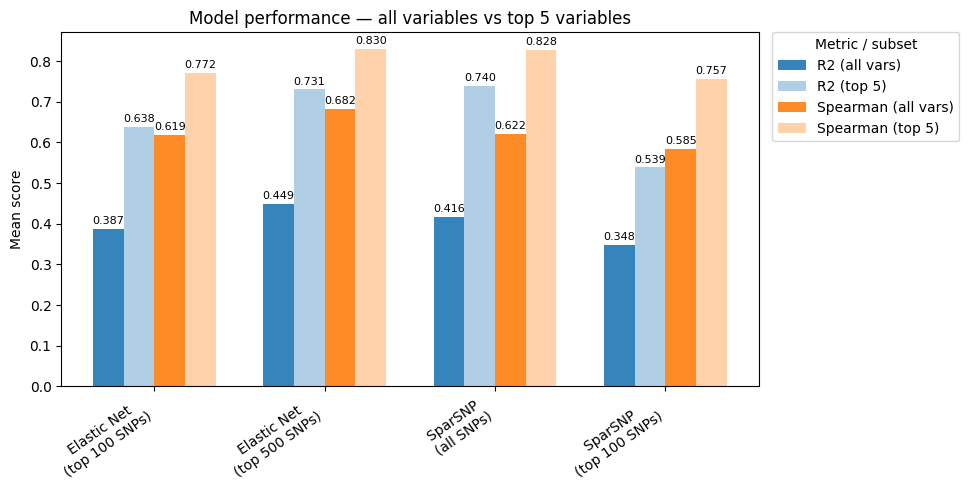

In [109]:
mean_r2 = r2_results[models].mean()
sem_r2 = r2_results[models].sem()
mean_s = spearman_results[models].mean()
sem_s = spearman_results[models].sem()

# new: compute top-5 means & sem per model (rank by each metric separately)
mean_r2_top5 = r2_results[models].apply(lambda col: col.sort_values(ascending=False).head(5).mean())
mean_s_top5 = spearman_results[models].apply(lambda col: col.sort_values(ascending=False).head(5).mean())

# plotting: all vs top-5 (4 bars per model: R2_all, R2_top5, S_all, S_top5)
x = np.arange(len(models))
width = 0.18
fig, ax = plt.subplots(figsize=(12,5))

# offsets: -1.5w, -0.5w, +0.5w, +1.5w
b_r2_all   = ax.bar(x - 1.5*width, mean_r2.values,       width,     capsize=4, color='#1f77b4', alpha=0.9, label='R2 (all vars)')
b_r2_top5  = ax.bar(x - 0.5*width, mean_r2_top5.values,  width,  capsize=4, color='#1f77b4', alpha=0.35, label='R2 (top 5)')
b_s_all    = ax.bar(x + 0.5*width, mean_s.values,        width,      capsize=4, color='#ff7f0e', alpha=0.9, label='Spearman (all vars)')
b_s_top5   = ax.bar(x + 1.5*width, mean_s_top5.values,   width,   capsize=4, color='#ff7f0e', alpha=0.35, label='Spearman (top 5)')

# value labels for clarity
ax.bar_label(b_r2_all,  labels=[f"{v:.3f}" for v in mean_r2.values], padding=2, fontsize=8)
ax.bar_label(b_r2_top5, labels=[f"{v:.3f}" for v in mean_r2_top5.values], padding=2, fontsize=8)
ax.bar_label(b_s_all,   labels=[f"{v:.3f}" for v in mean_s.values], padding=2, fontsize=8)
ax.bar_label(b_s_top5,  labels=[f"{v:.3f}" for v in mean_s_top5.values], padding=2, fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels([pretty_map.get(m, m) for m in models], rotation=35, ha='right')
ax.set_ylabel('Mean score')
ax.set_title('Model performance — all variables vs top 5 variables')

# legend and layout
ax.legend(title='Metric / subset', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(rect=[0,0,0.82,1])
plt.show()

# also update the summary table to include top-5 means
# summary_df = pd.DataFrame({
#     'R2_mean_all': mean_r2.round(3),
#     'R2_sem_all': sem_r2.round(3),
#     'R2_mean_top5': mean_r2_top5.round(3),
#     'R2_sem_top5': sem_r2_top5.round(3),
#     'Spearman_mean_all': mean_s.round(3),
#     'Spearman_sem_all': sem_s.round(3),
#     'Spearman_mean_top5': mean_s_top5.round(3),
#     'Spearman_sem_top5': sem_s_top5.round(3),
# })
# print(summary_df)

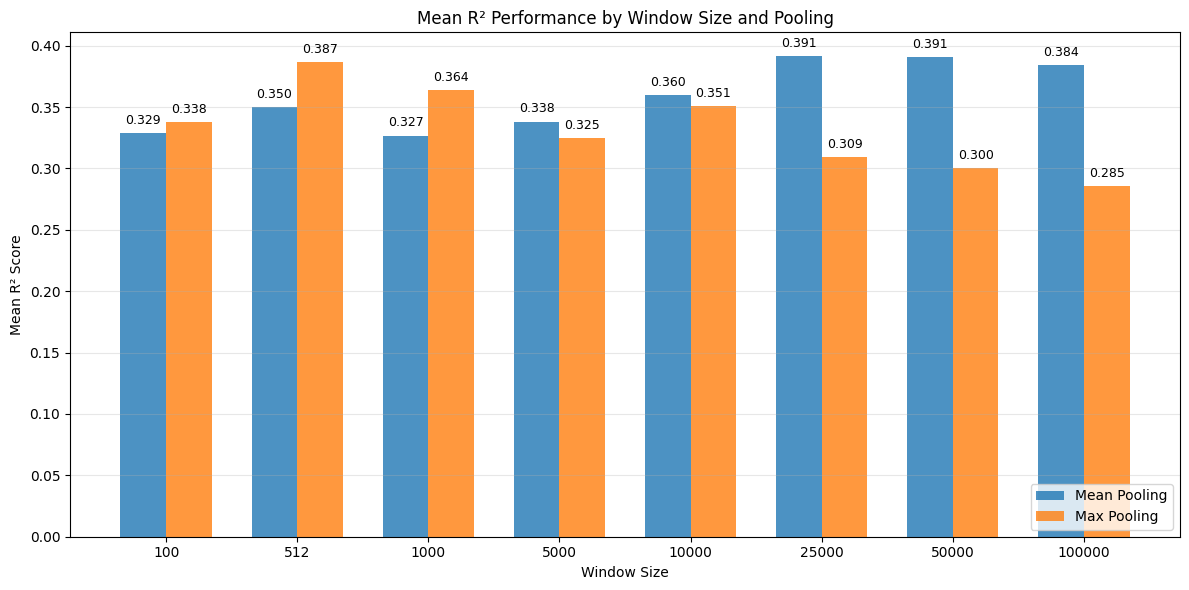

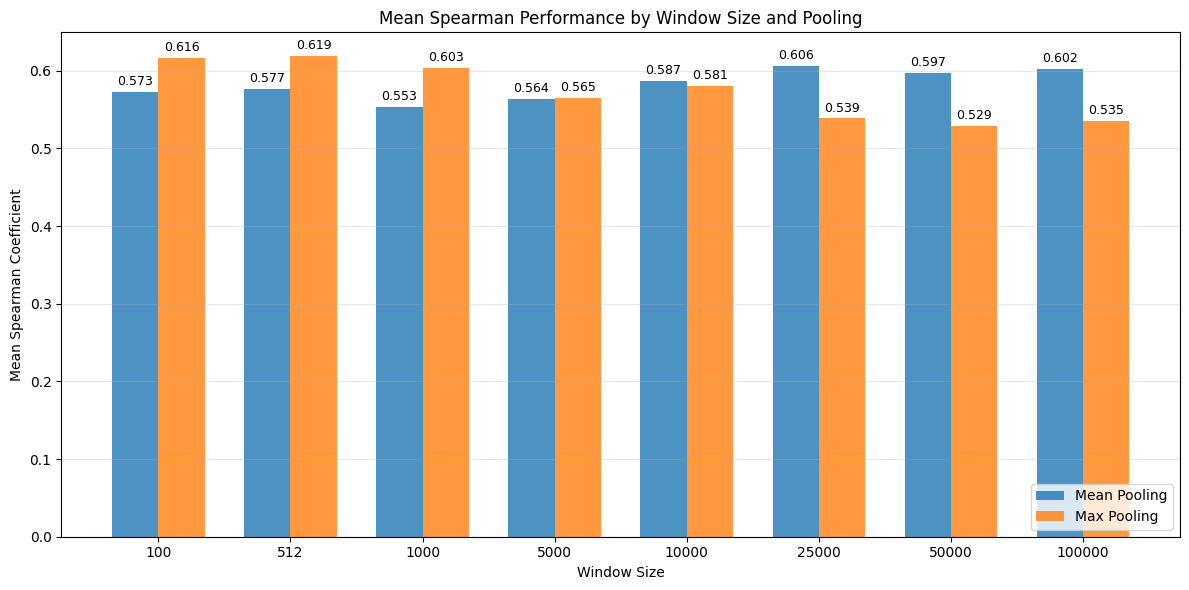

Summary of window size and pooling performance:

R² Scores:
  100 (max): 0.338
  100 (mean): 0.329
  512 (max): 0.387
  512 (mean): 0.350
  1000 (max): 0.364
  1000 (mean): 0.327
  5000 (max): 0.325
  5000 (mean): 0.338
  10000 (max): 0.351
  10000 (mean): 0.360
  25000 (max): 0.309
  25000 (mean): 0.391
  50000 (max): 0.300
  50000 (mean): 0.391
  100000 (max): 0.285
  100000 (mean): 0.384

Spearman Coefficients:
  100 (max): 0.616
  100 (mean): 0.573
  512 (max): 0.619
  512 (mean): 0.577
  1000 (max): 0.603
  1000 (mean): 0.553
  5000 (max): 0.565
  5000 (mean): 0.564
  10000 (max): 0.581
  10000 (mean): 0.587
  25000 (max): 0.539
  25000 (mean): 0.606
  50000 (max): 0.529
  50000 (mean): 0.597
  100000 (max): 0.535
  100000 (mean): 0.602

Best R² performance: 25000 (mean) = 0.391
Best Spearman performance: 512 (max) = 0.619


In [ ]:
# Load the sequence length results
seq_r2_df = pd.read_csv("Results/combined_seq_len_r2.csv")
seq_spearman_df = pd.read_csv("Results/combined_seq_len_spearman.csv")

# Extract window sizes and pooling types from column names
import re

def parse_model_name(col_name):
    # Parse column names like "512_max", "1000_mean", etc.
    parts = col_name.split('_')
    if len(parts) == 2 and parts[1] in ['max', 'mean']:
        return int(parts[0]), parts[1]
    return None, None

# Create structured data for plotting
plot_data = []
for col in seq_r2_df.columns:
    if col != 'BIO_ID':
        window_size, pooling = parse_model_name(col)
        if window_size is not None:
            mean_r2 = seq_r2_df[col].mean()
            mean_spearman = seq_spearman_df[col].mean()
            plot_data.append({
                'Window_Size': window_size,
                'Pooling': pooling,
                'Mean_R2': mean_r2,
                'Mean_Spearman': mean_spearman,
                'Model': f"{window_size}_{pooling}"
            })

plot_df = pd.DataFrame(plot_data)
plot_df = plot_df.sort_values(['Window_Size', 'Pooling'])

# Get unique window sizes for x-axis
window_sizes = sorted(plot_df['Window_Size'].unique())
pooling_types = ['mean', 'max']

# Set up colors for pooling types
pooling_colors = {'mean': '#1f77b4', 'max': '#ff7f0e'}

# Plot 1: R2 scores with grouped bars
fig1, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(window_sizes))
width = 0.35

mean_values = []
max_values = []

for window_size in window_sizes:
    mean_val = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'mean')]['Mean_R2'].iloc[0]
    max_val = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'max')]['Mean_R2'].iloc[0]
    mean_values.append(mean_val)
    max_values.append(max_val)

ax1.bar(x - width/2, mean_values, width, label='Mean Pooling', color=pooling_colors['mean'])
ax1.bar(x + width/2, max_values, width, label='Max Pooling', color=pooling_colors['max'])

ax1.set_xlabel('Window Size (bp)')
ax1.set_ylabel('Mean R² Score')
ax1.set_title('Effect of Window Size and Pooling Strategy on R² Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(window_sizes)
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 2: Spearman scores with grouped bars
fig2, ax2 = plt.subplots(figsize=(12, 6))

mean_values_spearman = []
max_values_spearman = []

for window_size in window_sizes:
    mean_val = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'mean')]['Mean_Spearman'].iloc[0]
    max_val = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'max')]['Mean_Spearman'].iloc[0]
    mean_values_spearman.append(mean_val)
    max_values_spearman.append(max_val)

ax2.bar(x - width/2, mean_values_spearman, width, label='Mean Pooling', color=pooling_colors['mean'])
ax2.bar(x + width/2, max_values_spearman, width, label='Max Pooling', color=pooling_colors['max'])

ax2.set_xlabel('Window Size (bp)')
ax2.set_ylabel('Mean Spearman Coefficient')
ax2.set_title('Effect of Window Size and Pooling Strategy on Spearman Performance')
ax2.set_xticks(x)
ax2.set_xticklabels(window_sizes)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary Statistics:")
print(plot_df[['Window_Size', 'Pooling', 'Mean_R2', 'Mean_Spearman']].to_string(index=False))

# Additional analysis: difference between pooling strategies
print("\nDifference (Max - Mean) by Window Size:")
for window_size in window_sizes:
    mean_r2 = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'mean')]['Mean_R2'].iloc[0]
    max_r2 = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'max')]['Mean_R2'].iloc[0]
    mean_spearman = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'mean')]['Mean_Spearman'].iloc[0]
    max_spearman = plot_df[(plot_df['Window_Size'] == window_size) & (plot_df['Pooling'] == 'max')]['Mean_Spearman'].iloc[0]
    print(f"  {window_size}bp: R² diff = {max_r2 - mean_r2:+.4f}, Spearman diff = {max_spearman - mean_spearman:+.4f}")

/tmp/ipykernel_2157/3954209360.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = pooling_data.groupby('Window_Size')['Score'].mean()


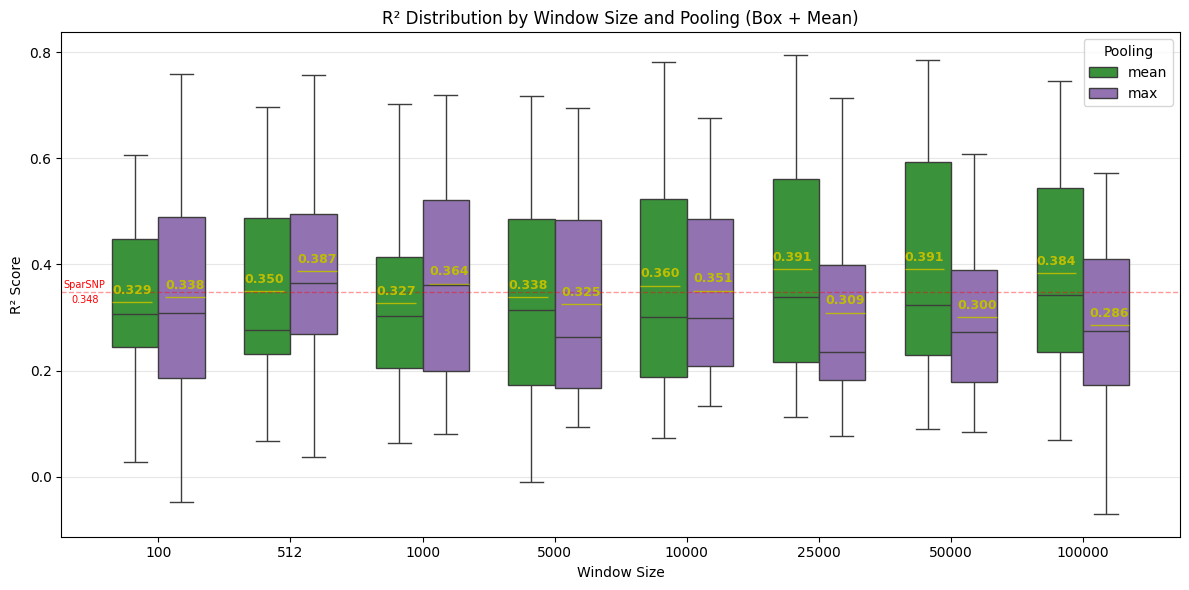

/tmp/ipykernel_2157/3954209360.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = pooling_data.groupby('Window_Size')['Score'].mean()


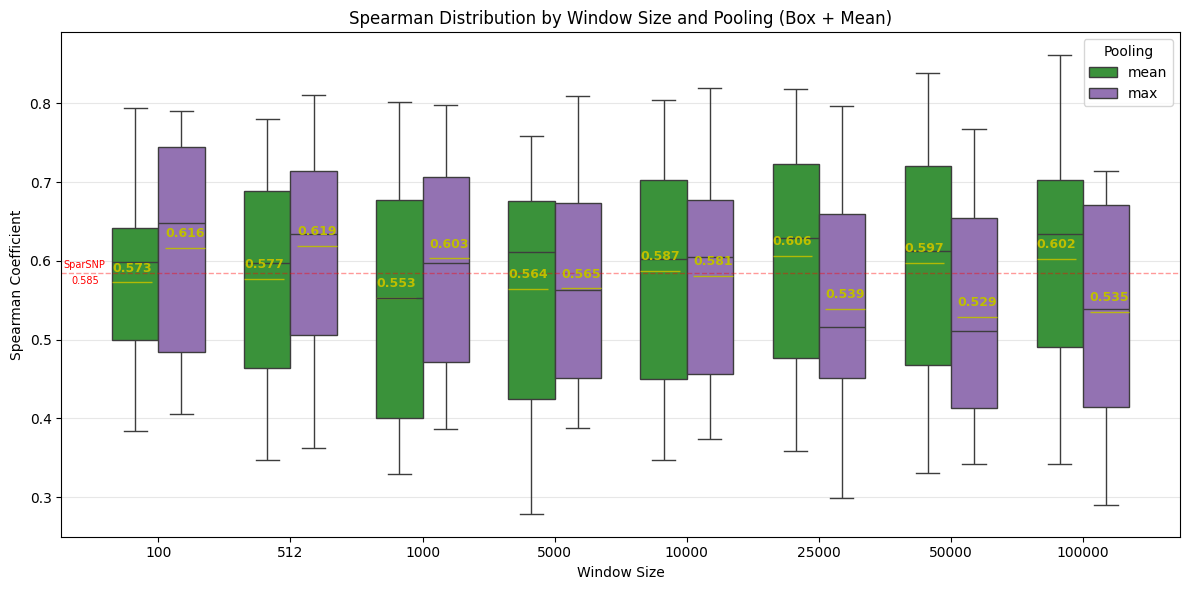

Summary of window size and pooling performance:

R² Scores (mean ± std, median):
  100 (max): 0.338 ± 0.238, median=0.307
  100 (mean): 0.329 ± 0.174, median=0.306
  512 (max): 0.387 ± 0.193, median=0.365
  512 (mean): 0.350 ± 0.191, median=0.276
  1000 (max): 0.364 ± 0.207, median=0.362
  1000 (mean): 0.327 ± 0.187, median=0.303
  5000 (max): 0.325 ± 0.194, median=0.264
  5000 (mean): 0.338 ± 0.211, median=0.314
  10000 (max): 0.351 ± 0.181, median=0.298
  10000 (mean): 0.360 ± 0.214, median=0.301
  25000 (max): 0.309 ± 0.196, median=0.235
  25000 (mean): 0.391 ± 0.209, median=0.338
  50000 (max): 0.300 ± 0.168, median=0.272
  50000 (mean): 0.391 ± 0.215, median=0.324
  100000 (max): 0.286 ± 0.176, median=0.274
  100000 (mean): 0.384 ± 0.208, median=0.342

Spearman Coefficients (mean ± std, median):
  100 (max): 0.616 ± 0.136, median=0.647
  100 (mean): 0.573 ± 0.119, median=0.598
  512 (max): 0.619 ± 0.133, median=0.635
  512 (mean): 0.577 ± 0.135, median=0.597
  1000 (max): 0.603 ± 

/tmp/ipykernel_2157/3954209360.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_summary = long_df[long_df['Metric']=='R2'].groupby(['Window_Size', 'Pooling'])['Score'].agg(['mean', 'std', 'median'])
/tmp/ipykernel_2157/3954209360.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s_summary = long_df[long_df['Metric']=='Spearman'].groupby(['Window_Size', 'Pooling'])['Score'].agg(['mean', 'std', 'median'])


In [3]:
# Load the sequence length results
seq_r2_df = pd.read_csv("/home/andrazzrimsek/DataM/WorldClim/Datasets/combined_seq_len_r2.csv")
seq_spearman_df = pd.read_csv("/home/andrazzrimsek/DataM/WorldClim/Datasets/combined_seq_len_spearman.csv")

# SparSNP baseline (all SNPs model) for reference
sparsnp_r2 = 0.348
sparsnp_spearman = 0.585

# Extract window sizes and pooling types from column names
import re
import seaborn as sns

def parse_model_name(col_name):
    # Parse column names like "512_max", "1000_mean", etc.
    parts = col_name.split('_')
    if len(parts) == 2 and parts[1] in ['max', 'mean']:
        return int(parts[0]), parts[1]
    return None, None

# Build long-form dataframe with per-variable scores for each window size & pooling
records = []
for col in seq_r2_df.columns:
    if col != 'BIO_ID':
        window_size, pooling = parse_model_name(col)
        if window_size is not None:
            # R2 values for each variable
            for v in seq_r2_df[col].dropna().values:
                records.append({
                    'Window_Size': window_size,
                    'Pooling': pooling,
                    'Metric': 'R2',
                    'Score': v,
                    'Model': f"{window_size}_{pooling}"
                })
            # Spearman values for each variable
            if col in seq_spearman_df.columns:
                for v in seq_spearman_df[col].dropna().values:
                    records.append({
                        'Window_Size': window_size,
                        'Pooling': pooling,
                        'Metric': 'Spearman',
                        'Score': v,
                        'Model': f"{window_size}_{pooling}"
                    })

long_df = pd.DataFrame(records)

# Get unique window sizes for x-axis ordering
window_sizes = sorted(long_df['Window_Size'].unique())
long_df['Window_Size'] = pd.Categorical(long_df['Window_Size'], categories=window_sizes, ordered=True)

# Set up colors for pooling types
pooling_colors = {'mean': '#2ca02c', 'max': '#9467bd'}

# Plot 1: R2 distribution with box plots and mean lines
fig1, ax1 = plt.subplots(figsize=(12, 6))

# Box plots (no fliers) with hue by Pooling
a1 = sns.boxplot(data=long_df[long_df['Metric']=='R2'], x='Window_Size', y='Score', hue='Pooling',
                 palette=pooling_colors, showfliers=False, width=0.7, ax=ax1)

# Calculate and plot mean lines for each window size and pooling combination
r2_data = long_df[long_df['Metric']=='R2']
window_positions = {ws: i for i, ws in enumerate(window_sizes)}

for pooling_type in ['mean', 'max']:
    pooling_data = r2_data[r2_data['Pooling'] == pooling_type]
    means = pooling_data.groupby('Window_Size')['Score'].mean()

    # x positions for mean lines (offset to match hue dodge)
    offset = -0.2 if pooling_type == 'mean' else 0.2
    x_positions = [window_positions[ws] + offset for ws in means.index]

    # Plot horizontal lines for means and annotate values
    for x_pos, mean_val in zip(x_positions, means.values):
        ax1.hlines(mean_val, x_pos - 0.15, x_pos + 0.15,
                   colors='y', linewidth=1, alpha=0.9)
        ax1.text(x_pos, mean_val + 0.01, f'{mean_val:.3f}',
                 ha='center', va='bottom', fontsize=9, fontweight='bold',
                 color='y')

ax1.axhline(sparsnp_r2, linestyle='--', color='red', linewidth=1, alpha=0.4)
ax1.text(-0.4, sparsnp_r2 + 0.004, f"SparSNP", ha='right', va='bottom', fontsize=7, color='red')
ax1.text(-0.45, sparsnp_r2 - 0.024, f"{sparsnp_r2:.3f}", ha='right', va='bottom', fontsize=7, color='red')
ax1.set_xlabel('Window Size')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Distribution by Window Size and Pooling (Box + Mean)')
ax1.grid(axis='y', alpha=0.3)
ax1.legend(title='Pooling', loc='upper right')

plt.tight_layout()
plt.show()

# Plot 2: Spearman distribution with box plots and mean lines
fig2, ax2 = plt.subplots(figsize=(12, 6))

# Box plots (no fliers) with hue by Pooling
a2 = sns.boxplot(data=long_df[long_df['Metric']=='Spearman'], x='Window_Size', y='Score', hue='Pooling',
                 palette=pooling_colors, showfliers=False, width=0.7, ax=ax2)

# Calculate and plot mean lines for each window size and pooling combination
spearman_data = long_df[long_df['Metric']=='Spearman']

for pooling_type in ['mean', 'max']:
    pooling_data = spearman_data[spearman_data['Pooling'] == pooling_type]
    means = pooling_data.groupby('Window_Size')['Score'].mean()

    # x positions for mean lines (offset to match hue dodge)
    offset = -0.2 if pooling_type == 'mean' else 0.2
    x_positions = [window_positions[ws] + offset for ws in means.index]

    # Plot horizontal lines for means and annotate values
    for x_pos, mean_val in zip(x_positions, means.values):
        ax2.hlines(mean_val, x_pos - 0.15, x_pos + 0.15,
                   colors='y', linewidth=1, alpha=0.9)
        ax2.text(x_pos, mean_val + 0.01, f'{mean_val:.3f}',
                 ha='center', va='bottom', fontsize=9, fontweight='bold',
                 color='y')

ax2.axhline(sparsnp_spearman, linestyle='--', color='red', linewidth=1, alpha=0.4)
ax2.text(-0.4, sparsnp_spearman + 0.004, f"SparSNP", ha='right', va='bottom', fontsize=7, color='red')
ax2.text(-0.45, sparsnp_spearman - 0.017, f"{sparsnp_spearman:.3f}", ha='right', va='bottom', fontsize=7, color='red')
ax2.set_xlabel('Window Size')
ax2.set_ylabel('Spearman Coefficient')
ax2.set_title('Spearman Distribution by Window Size and Pooling (Box + Mean)')
ax2.grid(axis='y', alpha=0.3)
ax2.legend(title='Pooling', loc='upper right')

plt.tight_layout()
plt.show()

# Print summary statistics (means and medians)
print("Summary of window size and pooling performance:")
print("\nR² Scores (mean ± std, median):")
r2_summary = long_df[long_df['Metric']=='R2'].groupby(['Window_Size', 'Pooling'])['Score'].agg(['mean', 'std', 'median'])
for (ws, pool), stats in r2_summary.iterrows():
    print(f"  {ws} ({pool}): {stats['mean']:.3f} ± {stats['std']:.3f}, median={stats['median']:.3f}")

print("\nSpearman Coefficients (mean ± std, median):")
s_summary = long_df[long_df['Metric']=='Spearman'].groupby(['Window_Size', 'Pooling'])['Score'].agg(['mean', 'std', 'median'])
for (ws, pool), stats in s_summary.iterrows():
    print(f"  {ws} ({pool}): {stats['mean']:.3f} ± {stats['std']:.3f}, median={stats['median']:.3f}")

# Find best performing configurations by mean
best_r2 = r2_summary['mean'].idxmax()
best_spearman = s_summary['mean'].idxmax()

print(f"\nBest R² performance: {best_r2[0]} ({best_r2[1]}) = {r2_summary.loc[best_r2, 'mean']:.3f}")
print(f"Best Spearman performance: {best_spearman[0]} ({best_spearman[1]}) = {s_summary.loc[best_spearman, 'mean']:.3f}")

/tmp/ipykernel_2157/2248256368.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=r2_combined, x='Window_Size', y='Score',
/tmp/ipykernel_2157/2248256368.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['SparSNP\n(100 SNPs)', '100', '1,000', '10,000', '50,000'])


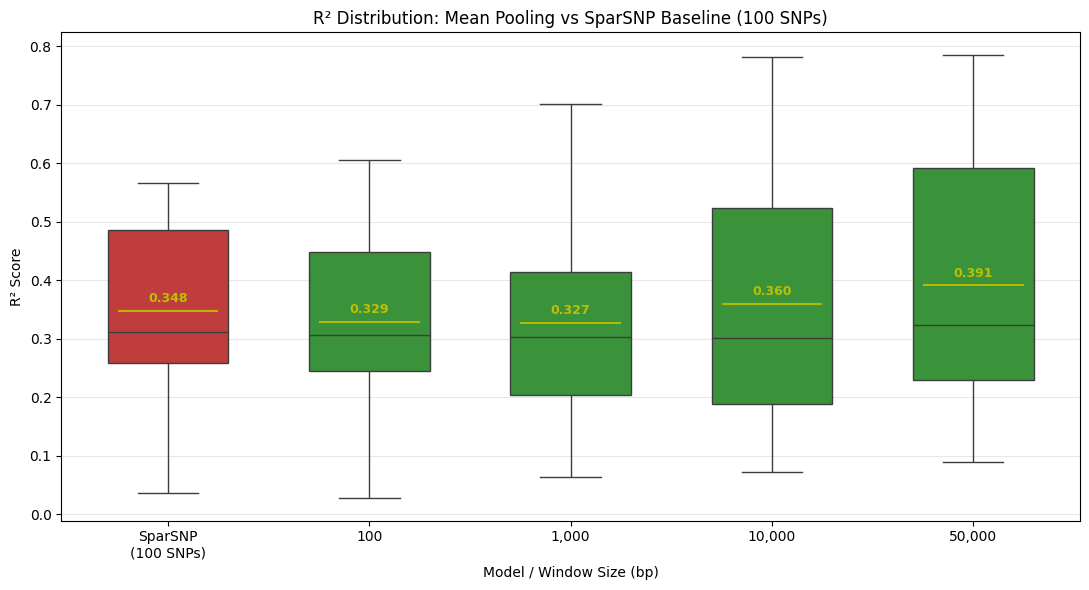

/tmp/ipykernel_2157/2248256368.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spearman_combined, x='Window_Size', y='Score',
/tmp/ipykernel_2157/2248256368.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['SparSNP\n(100 SNPs)', '100', '1,000', '10,000', '50,000'])


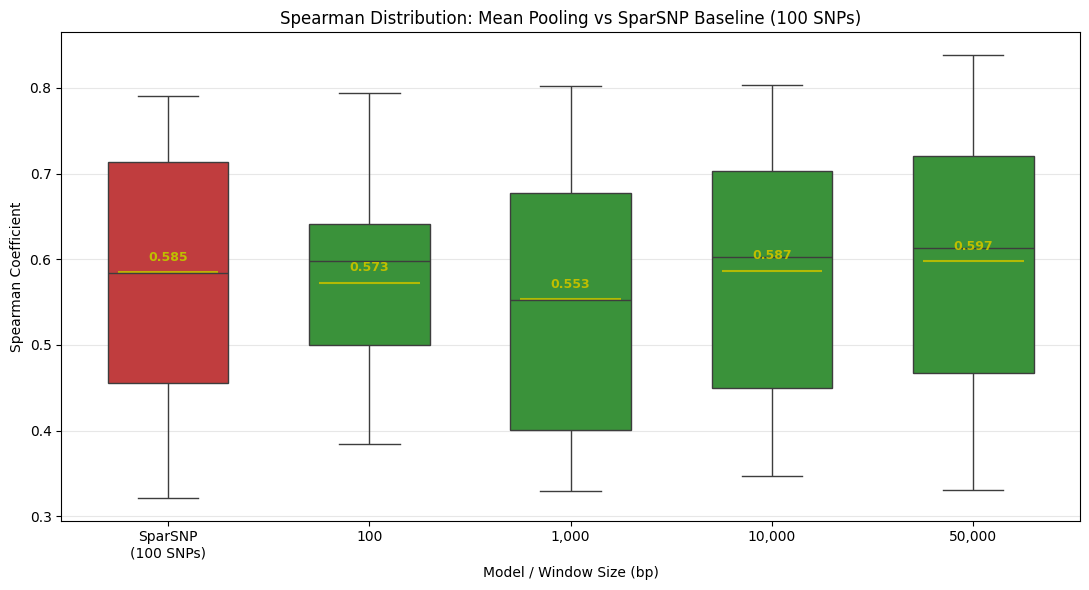

Summary: Mean Pooling Performance vs SparSNP Baseline

R² Scores (mean ± std, median):
  SparSNP (100 SNPs): 0.348 ± 0.165, median=0.311
  100 bp: 0.329 ± 0.174, median=0.306
  1000 bp: 0.327 ± 0.187, median=0.303
  10000 bp: 0.360 ± 0.214, median=0.301
  50000 bp: 0.391 ± 0.215, median=0.324

Spearman Coefficients (mean ± std, median):
  SparSNP (100 SNPs): 0.585 ± 0.151, median=0.584
  100 bp: 0.573 ± 0.119, median=0.598
  1000 bp: 0.553 ± 0.154, median=0.552
  10000 bp: 0.587 ± 0.145, median=0.603
  50000 bp: 0.597 ± 0.159, median=0.613


In [ ]:
# Filtered plot: SparSNP 100 SNP baseline + mean pooling (100, 1000, 10000, 50000)
# Add SparSNP as a box plot by including its per-variable scores
target_windows = [100, 1000, 10000, 50000]

# Filter the long_df to only include mean pooling with specific window sizes
filtered_df = long_df[(long_df['Pooling'] == 'mean') & (long_df['Window_Size'].isin(target_windows))].copy()

# Add SparSNP scores as a separate category
# Load SparSNP results to get per-variable scores
sparsnp_r2_df = pd.read_csv("Results/report_sparsnp_combined_r2_results.csv")
sparsnp_spearman_df = pd.read_csv("Results/report_sparsnp_combined_spearman_results.csv")

# Extract SparSNP_100 scores per variable
sparsnp_records = []
if 'SparSNP_100' in sparsnp_r2_df.columns:
    for v in sparsnp_r2_df['SparSNP_100'].dropna().values:
        sparsnp_records.append({
            'Window_Size': 'SparSNP',  # Use a string label for SparSNP
            'Pooling': 'baseline',
            'Metric': 'R2',
            'Score': v,
            'Model': 'SparSNP_100'
        })

if 'SparSNP_100' in sparsnp_spearman_df.columns:
    for v in sparsnp_spearman_df['SparSNP_100'].dropna().values:
        sparsnp_records.append({
            'Window_Size': 'SparSNP',
            'Pooling': 'baseline',
            'Metric': 'Spearman',
            'Score': v,
            'Model': 'SparSNP_100'
        })

sparsnp_df = pd.DataFrame(sparsnp_records)

# Combine with filtered mean pooling data
# Convert Window_Size to string for uniform handling
filtered_df['Window_Size'] = filtered_df['Window_Size'].astype(str)
combined_filtered = pd.concat([sparsnp_df, filtered_df], ignore_index=True)

# Define order for x-axis: SparSNP first, then window sizes in ascending order
window_order = ['SparSNP'] + [str(w) for w in sorted(target_windows)]
combined_filtered['Window_Size'] = pd.Categorical(combined_filtered['Window_Size'], categories=window_order, ordered=True)

# Color scheme: SparSNP in red, mean pooling in green
colors = {'SparSNP': '#d62728', **{str(w): '#2ca02c' for w in target_windows}}

# Plot 1: R² distribution with box plots
fig1, ax1 = plt.subplots(figsize=(10, 6))

r2_filtered = combined_filtered[combined_filtered['Metric'] == 'R2']
sns.boxplot(data=r2_filtered, x='Window_Size', y='Score', palette=colors, ax=ax1)

ax1.set_xlabel('Window Size (bp) / Model')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Distribution: SparSNP Baseline vs Mean Pooling (Selected Window Sizes)')
ax1.grid(axis='y', alpha=0.3)

# Add mean value annotations
for i, window in enumerate(window_order):
    window_data = r2_filtered[r2_filtered['Window_Size'] == window]['Score']
    mean_val = window_data.mean()
    ax1.text(i, mean_val, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Plot 2: Spearman distribution with box plots
fig2, ax2 = plt.subplots(figsize=(10, 6))

spearman_filtered = combined_filtered[combined_filtered['Metric'] == 'Spearman']
sns.boxplot(data=spearman_filtered, x='Window_Size', y='Score', palette=colors, ax=ax2)

ax2.set_xlabel('Window Size (bp) / Model')
ax2.set_ylabel('Spearman Coefficient')
ax2.set_title('Spearman Distribution: SparSNP Baseline vs Mean Pooling (Selected Window Sizes)')
ax2.grid(axis='y', alpha=0.3)

# Add mean value annotations
for i, window in enumerate(window_order):
    window_data = spearman_filtered[spearman_filtered['Window_Size'] == window]['Score']
    mean_val = window_data.mean()
    ax2.text(i, mean_val, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Filtered Summary (SparSNP + Mean Pooling at selected window sizes):")
print("\nR² Scores (mean ± std):")
r2_summary_filtered = r2_filtered.groupby('Window_Size')['Score'].agg(['mean', 'std', 'count'])
print(r2_summary_filtered)

print("\nSpearman Coefficients (mean ± std):")
spearman_summary_filtered = spearman_filtered.groupby('Window_Size')['Score'].agg(['mean', 'std', 'count'])
print(spearman_summary_filtered)

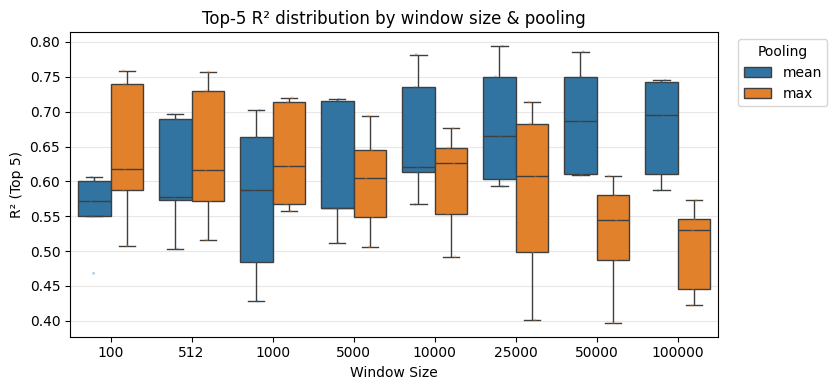

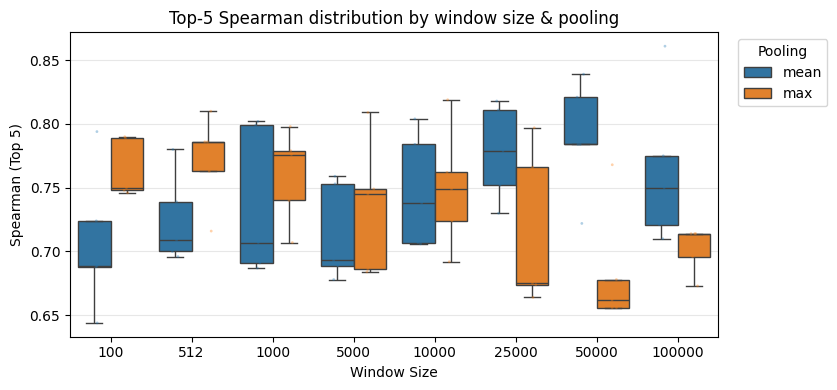

Top-5 mean summary:
Metric                  R2  Spearman
Window_Size Pooling                 
100         max      0.642     0.765
            mean     0.559     0.708
512         max      0.638     0.772
            mean     0.608     0.725
1000        max      0.636     0.760
            mean     0.573     0.737
5000        max      0.600     0.735
            mean     0.614     0.714
10000       max      0.599     0.749
            mean     0.663     0.748
25000       max      0.581     0.715
            mean     0.681     0.778
50000       max      0.523     0.684
            mean     0.688     0.790
100000      max      0.503     0.702
            mean     0.676     0.763
Best Top-5 R²: window 50000 pooling mean
Best Top-5 Spearman: window 50000 pooling mean


/tmp/ipykernel_2498/2657929913.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_top5 = plot_df_top5.groupby(['Window_Size','Pooling','Metric'])['Score'].mean().unstack('Metric')
/tmp/ipykernel_2498/2657929913.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_r2_top5 = plot_df_top5[plot_df_top5['Metric']=='R2'].groupby(['Window_Size','Pooling'])['Score'].mean().idxmax()
/tmp/ipykernel_2498/2657929913.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

In [113]:
# Top 5 variables focus: build long form for top-5 means per model (window_size, pooling)
plot_data_top5 = []
for col in seq_r2_df.columns:
    if col != 'BIO_ID':
        window_size, pooling = parse_model_name(col)
        if window_size is not None:
            top5_r2 = seq_r2_df[col].sort_values(ascending=False).head(5).values
            top5_s  = seq_spearman_df[col].sort_values(ascending=False).head(5).values
            for v in top5_r2:
                plot_data_top5.append({'Window_Size': window_size,'Pooling': pooling,'Metric': 'R2','Score': v,'Subset': 'Top5'})
            for v in top5_s:
                plot_data_top5.append({'Window_Size': window_size,'Pooling': pooling,'Metric': 'Spearman','Score': v,'Subset': 'Top5'})

plot_df_top5 = pd.DataFrame(plot_data_top5)
plot_df_top5['Window_Size'] = pd.Categorical(plot_df_top5['Window_Size'], categories=window_sizes, ordered=True)

pooling_palette = {'mean': '#1f77b4', 'max': '#ff7f0e'}

# Boxplots for top-5 R2
fig1, ax1 = plt.subplots(figsize=(10,4))
sns.boxplot(data=plot_df_top5[plot_df_top5['Metric']=='R2'], x='Window_Size', y='Score', hue='Pooling', palette=pooling_palette, showfliers=False, ax=ax1)
sns.stripplot(data=plot_df_top5[plot_df_top5['Metric']=='R2'], x='Window_Size', y='Score', hue='Pooling', dodge=True, palette=pooling_palette, size=2, alpha=0.35, ax=ax1, linewidth=0)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:2], labels[:2], title='Pooling', bbox_to_anchor=(1.02,1), loc='upper left')
ax1.set_title('Top-5 R² distribution by window size & pooling')
ax1.set_xlabel('Window Size')
ax1.set_ylabel('R² (Top 5)')
ax1.grid(axis='y', alpha=0.3)
plt.tight_layout(rect=[0,0,0.85,1])
plt.show()

# Boxplots for top-5 Spearman
fig2, ax2 = plt.subplots(figsize=(10,4))
sns.boxplot(data=plot_df_top5[plot_df_top5['Metric']=='Spearman'], x='Window_Size', y='Score', hue='Pooling', palette=pooling_palette, showfliers=False, ax=ax2)
sns.stripplot(data=plot_df_top5[plot_df_top5['Metric']=='Spearman'], x='Window_Size', y='Score', hue='Pooling', dodge=True, palette=pooling_palette, size=2, alpha=0.35, ax=ax2, linewidth=0)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:2], labels[:2], title='Pooling', bbox_to_anchor=(1.02,1), loc='upper left')
ax2.set_title('Top-5 Spearman distribution by window size & pooling')
ax2.set_xlabel('Window Size')
ax2.set_ylabel('Spearman (Top 5)')
ax2.grid(axis='y', alpha=0.3)
plt.tight_layout(rect=[0,0,0.85,1])
plt.show()

# Summary stats for top-5 means
summary_top5 = plot_df_top5.groupby(['Window_Size','Pooling','Metric'])['Score'].mean().unstack('Metric')
print('Top-5 mean summary:')
print(summary_top5.round(3))

best_r2_top5 = plot_df_top5[plot_df_top5['Metric']=='R2'].groupby(['Window_Size','Pooling'])['Score'].mean().idxmax()
best_s_top5 = plot_df_top5[plot_df_top5['Metric']=='Spearman'].groupby(['Window_Size','Pooling'])['Score'].mean().idxmax()
print(f"Best Top-5 R²: window {best_r2_top5[0]} pooling {best_r2_top5[1]}")
print(f"Best Top-5 Spearman: window {best_s_top5[0]} pooling {best_s_top5[1]}")

## SNP count (genome size) analysis — 1000 bp window, max pooling
Distributions (box + jitter) show variability across variables for each SNP count. Boxes summarize median and IQR; points indicate individual variable performances.

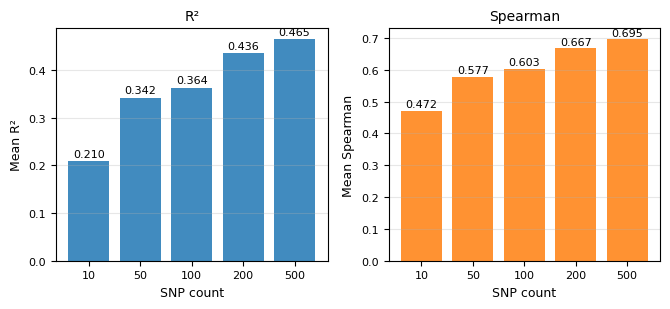

Summary: window 1000 bp, max pooling
  SNPs=10: R² = 0.210 | Spearman = 0.472
  SNPs=50: R² = 0.342 | Spearman = 0.577
  SNPs=100: R² = 0.364 | Spearman = 0.603
  SNPs=200: R² = 0.436 | Spearman = 0.667
  SNPs=500: R² = 0.465 | Spearman = 0.695


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load combined size-test results
size_r2_path = "Results/combined_size_test_r2.csv"
size_s_path  = "Results/combined_size_test_spearman.csv"
size_r2 = pd.read_csv(size_r2_path)
size_s  = pd.read_csv(size_s_path)

# Helper to parse columns like SNPs50_1000_max or AllSNPs_1000_max (single pooling: max)
col_meta = []
for col in size_r2.columns:
    if col == 'BIO_ID':
        continue
    m = re.match(r"^(SNPs(\d+)|(AllSNPs|RandSNPs))_(\d+)_(max)$", col)
    if not m:
        continue
    snps_num = m.group(2)
    snp_label = 'All' if snps_num is None else str(int(snps_num))
    window = int(m.group(4))
    pooling = m.group(5)
    col_meta.append({'col': col, 'SNPs': snp_label, 'Window': window, 'Pooling': pooling})

meta_df = pd.DataFrame(col_meta)
if meta_df.empty:
    raise ValueError("No matching columns found in combined_size_test_r2.csv.")

# Restrict to one window (prefer 1000 bp) and max pooling
wins = sorted(meta_df['Window'].unique())
target_window = 1000 if 1000 in set(wins) else wins[0]
meta_df = meta_df[(meta_df['Window'] == target_window) & (meta_df['Pooling'] == 'max')]

# Aggregate mean scores per SNP count
records = []
for _, row in meta_df.iterrows():
    r2_mean = size_r2[row['col']].mean()
    s_mean  = size_s[row['col']].mean() if row['col'] in size_s.columns else np.nan
    records.append({
        'SNPs': row['SNPs'],
        'R2_mean': r2_mean,
        'Spearman_mean': s_mean,
    })
perf_df = pd.DataFrame(records)

# Ensure category ordering for SNP counts (strings to accommodate 'All')
order_labels = [lbl for lbl in ['10','50','100','200','500','All'] if lbl in set(perf_df['SNPs'])]
perf_df['SNPs'] = pd.Categorical(perf_df['SNPs'], categories=order_labels, ordered=True)
perf_df = perf_df.sort_values('SNPs')

# Side-by-side figure to fit report textwidth (~6.8 inches wide)
xs = np.arange(len(order_labels))
fig, axes = plt.subplots(ncols=2, figsize=(6.8, 3.2), sharex=True)

# Left subplot: R² vs SNP count
ax = axes[0]
r2_vals = perf_df.set_index('SNPs').loc[order_labels]['R2_mean'].values
bars = ax.bar(xs, r2_vals, color='#1f77b4', alpha=0.85)
ax.set_title('R²', fontsize=10)
ax.set_ylabel('Mean R²', fontsize=9)
ax.set_xticks(xs)
ax.set_xticklabels(order_labels)
ax.set_xlabel('SNP count', fontsize=9)
ax.grid(axis='y', alpha=0.3)
for b, v in zip(bars, r2_vals):
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 0.005, f"{v:.3f}", ha='center', va='bottom', fontsize=8)

# Right subplot: Spearman vs SNP count
ax = axes[1]
s_vals = perf_df.set_index('SNPs').loc[order_labels]['Spearman_mean'].values
bars = ax.bar(xs, s_vals, color='#ff7f0e', alpha=0.85)
ax.set_title('Spearman', fontsize=10)
ax.set_ylabel('Mean Spearman', fontsize=9)
ax.set_xticks(xs)
ax.set_xticklabels(order_labels)
ax.set_xlabel('SNP count', fontsize=9)
ax.grid(axis='y', alpha=0.3)
for b, v in zip(bars, s_vals):
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 0.005, f"{v:.3f}", ha='center', va='bottom', fontsize=8)

for a in axes:
    a.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

# Summary printout
print(f"Summary: window {target_window} bp, max pooling")
for lbl in order_labels:
    row = perf_df.set_index('SNPs').loc[lbl]
    print(f"  SNPs={lbl}: R² = {row['R2_mean']:.3f} | Spearman = {row['Spearman_mean']:.3f}")

## Predicted vs. True Analysis

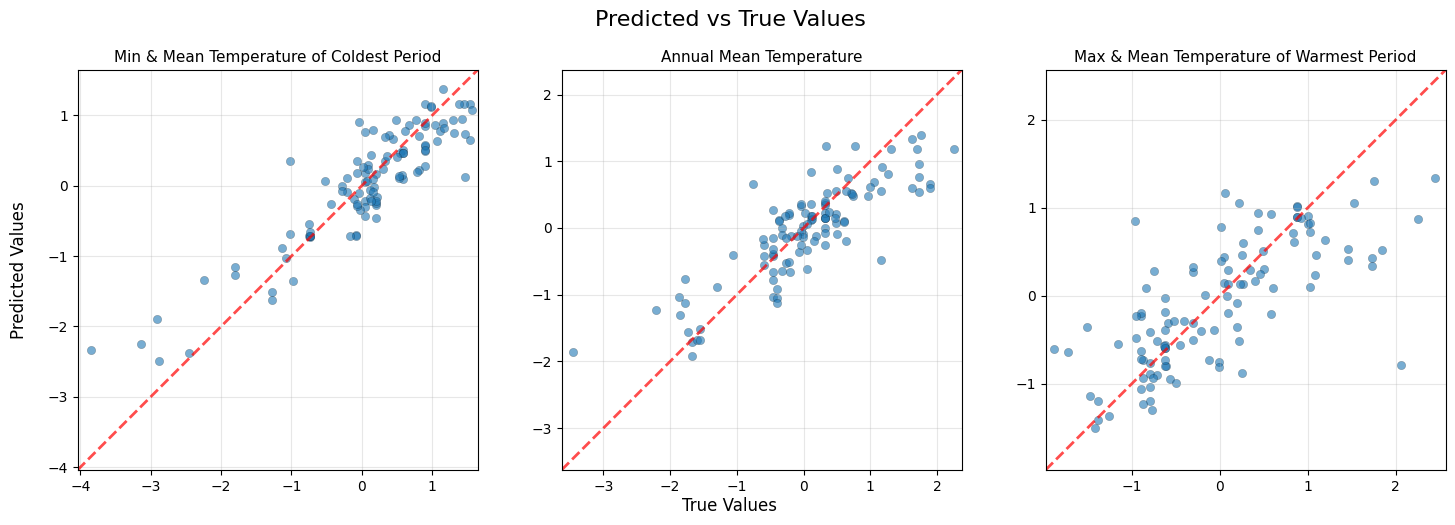

In [13]:
# Predicted vs. True Analysis - combined into a single multi-panel figure
final_predictions = pd.read_csv("/home/andrazzrimsek/DataM/WorldClim/Results/test_best/final_predictions.csv")
target_vars = ["BIO_11_6", "BIO1", "BIO_10_5"]

# Create a single figure with one subplot per target variable
n = len(target_vars)
fig, axs = plt.subplots(1, n, figsize=(5*n, 5), squeeze=False)
axs = axs[0]  # flatten row

for i, var in enumerate(target_vars):
    var_pred = final_predictions[f"pred_{var}"]
    var_true = final_predictions[f"true_{var}"]

    ax = axs[i]
    ax.scatter(var_true, var_pred, alpha=0.6, edgecolor='k', linewidth=0.2)

    # Diagonal reference line spanning the data range for this variable
    vmin = min(var_true.min()*1.05, var_pred.min()*1.05)
    vmax = max(var_true.max()*1.05, var_pred.max()*1.05)
    ax.plot([vmin, vmax], [vmin, vmax], 'r--', lw=2, alpha=0.7)

    ax.set_title(f"{bio_name_map.get(var, var)}", fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)

# Shared labels and overall layout
fig.suptitle("Predicted vs True Values", fontsize=16, y=1.02)
fig.supxlabel("True Values")
fig.supylabel("Predicted Values")
fig.tight_layout()
plt.show()

In [115]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.stats import bootstrap

# Load prediction data
sparsnp_predictions = pd.read_csv("/home/andrazzrimsek/DataM/WorldClim/Results/DeepSNP/test_deepsnp/sparsnp_predictions.csv")
deepsnp_predictions = pd.read_csv("/home/andrazzrimsek/DataM/WorldClim/Results/DeepSNP/test_deepsnp/deepsnp_predictions.csv")

# Extract true and predicted values
sparsnp_true = sparsnp_predictions['true_BIO_11_6'].to_numpy()
sparsnp_pred = sparsnp_predictions['pred_BIO_11_6'].to_numpy()

deepsnp_true = deepsnp_predictions['true_BIO_11_6'].to_numpy()
deepsnp_pred = deepsnp_predictions['pred_BIO_11_6'].to_numpy()

# Calculate R² scores
print(f"SparSNP R²: {r2_score(sparsnp_true, sparsnp_pred):.4f}")
print(f"DeepSNP R²: {r2_score(deepsnp_true, deepsnp_pred):.4f}")

# Bootstrap confidence intervals for SparSNP
# Pass data as tuple of (true_values, predicted_values)
def r2_statistic(y_true, y_pred):
    """Compute R² score. Works with bootstrap's resampling."""
    return r2_score(y_true, y_pred)

print("\nBootstrapping SparSNP...")
bootstrap_sparsnp = bootstrap(
    data=(sparsnp_true, sparsnp_pred),
    statistic=r2_statistic,
    n_resamples=10000,
    paired=True,  # True and pred values must be resampled together
    random_state=42,
    method='percentile'
)

print(f"SparSNP R² 95% CI: [{bootstrap_sparsnp.confidence_interval.low:.4f}, {bootstrap_sparsnp.confidence_interval.high:.4f}]")

print("\nBootstrapping DeepSNP...")
bootstrap_deepsnp = bootstrap(
    data=(deepsnp_true, deepsnp_pred),
    statistic=r2_statistic,
    n_resamples=10000,
    paired=True,
    random_state=42,
    method='percentile'
)

print(f"DeepSNP R² 95% CI: [{bootstrap_deepsnp.confidence_interval.low:.4f}, {bootstrap_deepsnp.confidence_interval.high:.4f}]")

SparSNP R²: 0.7979
DeepSNP R²: 0.8074

Bootstrapping SparSNP...
SparSNP R² 95% CI: [0.6693, 0.8659]

Bootstrapping DeepSNP...
SparSNP R² 95% CI: [0.6693, 0.8659]

Bootstrapping DeepSNP...
DeepSNP R² 95% CI: [0.6796, 0.8751]
DeepSNP R² 95% CI: [0.6796, 0.8751]


## DeepSNP vs SparSNP SNP selection comparison

Bootstrapped test to compare DeepSNP vs SparSNP selected SNPs performance on BIO_11_6 

In [116]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Load prediction data
sparsnp_predictions = pd.read_csv("/home/andrazzrimsek/DataM/WorldClim/Results/DeepSNP/test_deepsnp/sparsnp_predictions.csv")
deepsnp_predictions = pd.read_csv("/home/andrazzrimsek/DataM/WorldClim/Results/DeepSNP/test_deepsnp/deepsnp_predictions.csv")

# Extract true and predicted values
sparsnp_true = sparsnp_predictions['true_BIO_11_6'].to_numpy()
sparsnp_pred = sparsnp_predictions['pred_BIO_11_6'].to_numpy()

deepsnp_true = deepsnp_predictions['true_BIO_11_6'].to_numpy()
deepsnp_pred = deepsnp_predictions['pred_BIO_11_6'].to_numpy()

# Calculate R² scores
print(f"SparSNP R²: {r2_score(sparsnp_true, sparsnp_pred):.4f}")
print(f"DeepSNP R²: {r2_score(deepsnp_true, deepsnp_pred):.4f}")

# Manual bootstrap implementation for R² confidence intervals
def bootstrap_r2(y_true, y_pred, n_bootstrap=10000, confidence_level=0.95, random_state=42):
    """
    Compute bootstrap confidence interval for R² score.
    
    Parameters:
    -----------
    y_true : array-like
        True values
    y_pred : array-like
        Predicted values
    n_bootstrap : int
        Number of bootstrap samples
    confidence_level : float
        Confidence level (default 0.95 for 95% CI)
    random_state : int
        Random seed for reproducibility
    
    Returns:
    --------
    tuple : (r2_score, lower_ci, upper_ci)
    """
    rng = np.random.default_rng(random_state)
    n = len(y_true)
    
    # Calculate original R²
    r2_original = r2_score(y_true, y_pred)
    
    # Bootstrap resampling
    bootstrap_r2_scores = []
    for _ in range(n_bootstrap):
        # Resample indices with replacement
        indices = rng.integers(0, n, size=n)
        
        # Calculate R² on resampled data
        r2_boot = r2_score(y_true[indices], y_pred[indices])
        bootstrap_r2_scores.append(r2_boot)
    
    bootstrap_r2_scores = np.array(bootstrap_r2_scores)
    
    # Calculate percentile confidence intervals
    alpha = 1 - confidence_level
    lower_percentile = (alpha / 2) * 100
    upper_percentile = (1 - alpha / 2) * 100
    
    ci_lower = np.percentile(bootstrap_r2_scores, lower_percentile)
    ci_upper = np.percentile(bootstrap_r2_scores, upper_percentile)
    
    return r2_original, ci_lower, ci_upper

# Compute bootstrap CIs
print("\nBootstrapping SparSNP...")
sparsnp_r2, sparsnp_ci_low, sparsnp_ci_high = bootstrap_r2(sparsnp_true, sparsnp_pred)
print(f"SparSNP R²: {sparsnp_r2:.4f}")
print(f"SparSNP R² 95% CI: [{sparsnp_ci_low:.4f}, {sparsnp_ci_high:.4f}]")

print("\nBootstrapping DeepSNP...")
deepsnp_r2, deepsnp_ci_low, deepsnp_ci_high = bootstrap_r2(deepsnp_true, deepsnp_pred)
print(f"DeepSNP R²: {deepsnp_r2:.4f}")
print(f"DeepSNP R² 95% CI: [{deepsnp_ci_low:.4f}, {deepsnp_ci_high:.4f}]")

# Compare the two models
print("\n" + "="*60)
print("COMPARISON")
print("="*60)
print(f"DeepSNP advantage: {deepsnp_r2 - sparsnp_r2:.4f}")

SparSNP R²: 0.7979
DeepSNP R²: 0.8074

Bootstrapping SparSNP...
SparSNP R²: 0.7979
SparSNP R² 95% CI: [0.6658, 0.8654]

Bootstrapping DeepSNP...
SparSNP R²: 0.7979
SparSNP R² 95% CI: [0.6658, 0.8654]

Bootstrapping DeepSNP...
DeepSNP R²: 0.8074
DeepSNP R² 95% CI: [0.6763, 0.8737]

COMPARISON
DeepSNP advantage: 0.0095
DeepSNP R²: 0.8074
DeepSNP R² 95% CI: [0.6763, 0.8737]

COMPARISON
DeepSNP advantage: 0.0095


## Critical Difference Diagram: SparSNP vs Deep Learning Model

Friedman test with post-hoc Nemenyi to compare model performance across 18 variables. Critical difference (CD) diagrams visualize statistical significance of ranking differences between models.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy import stats

# Load both result files
sparsnp_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/Report/sparsnp_results.txt"
deep_path = "/home/andrazzrimsek/DataM/WorldClim/Datasets/Report/deep_results.txt"

sparsnp_df = pd.read_csv(sparsnp_path, sep=r'\s+')
deep_df = pd.read_csv(deep_path, sep=r'\s+')

# Ensure both have same BIO_IDs and align them
common_vars = set(sparsnp_df['BIO_ID']) & set(deep_df['BIO_ID'])
print(f"Number of common variables: {len(common_vars)}")

sparsnp_df = sparsnp_df[sparsnp_df['BIO_ID'].isin(common_vars)].sort_values('BIO_ID').reset_index(drop=True)
deep_df = deep_df[deep_df['BIO_ID'].isin(common_vars)].sort_values('BIO_ID').reset_index(drop=True)

# Build data matrix for CD diagram (rows = variables, columns = models)
# scikit-posthocs expects higher values = better, which is true for both R² and Spearman
r2_data = pd.DataFrame({
    'SparSNP': sparsnp_df['R2_Coefficient'].values,
    'Deep_Model': deep_df['R2_Coefficient'].values
}, index=sparsnp_df['BIO_ID'].values)

spearman_data = pd.DataFrame({
    'SparSNP': sparsnp_df['Spearman_Coefficient'].values,
    'Deep_Model': deep_df['Spearman_Coefficient'].values
}, index=sparsnp_df['BIO_ID'].values)

print("\nR² data shape:", r2_data.shape)
print("Spearman data shape:", spearman_data.shape)
print("\nR² summary:")
print(r2_data.describe())
print("\nSpearman summary:")
print(spearman_data.describe())

Number of common variables: 18

R² data shape: (18, 2)
Spearman data shape: (18, 2)

R² summary:
         SparSNP  Deep_Model
count  18.000000   18.000000
mean    0.441734    0.431433
std     0.187894    0.187990
min     0.097527    0.071600
25%     0.334120    0.336725
50%     0.435683    0.467050
75%     0.562863    0.561325
max     0.781489    0.728600

Spearman summary:
         SparSNP  Deep_Model
count  18.000000   18.000000
mean    0.650606    0.654717
std     0.157102    0.143101
min     0.403277    0.349800
25%     0.586556    0.564100
50%     0.628820    0.656550
75%     0.806743    0.778375
max     0.869256    0.835400


In [118]:
# For 2 models, use Wilcoxon signed-rank test (paired non-parametric test)
# H0: The two models have the same performance distribution across variables

# R² Wilcoxon test
wilcoxon_r2 = stats.wilcoxon(r2_data['SparSNP'], r2_data['Deep_Model'])
print("=" * 60)
print("R² COEFFICIENT COMPARISON")
print("=" * 60)
print(f"Wilcoxon signed-rank test statistic: {wilcoxon_r2.statistic:.4f}")
print(f"Wilcoxon test p-value: {wilcoxon_r2.pvalue:.4f}")
if wilcoxon_r2.pvalue < 0.05:
    print("→ Significant difference between models (p < 0.05)")
else:
    print("→ No significant difference between models (p ≥ 0.05)")

# Spearman Wilcoxon test
wilcoxon_s = stats.wilcoxon(spearman_data['SparSNP'], spearman_data['Deep_Model'])
print("\n" + "=" * 60)
print("SPEARMAN COEFFICIENT COMPARISON")
print("=" * 60)
print(f"Wilcoxon signed-rank test statistic: {wilcoxon_s.statistic:.4f}")
print(f"Wilcoxon test p-value: {wilcoxon_s.pvalue:.4f}")
if wilcoxon_s.pvalue < 0.05:
    print("→ Significant difference between models (p < 0.05)")
else:
    print("→ No significant difference between models (p ≥ 0.05)")

# Compute mean performance and paired differences
print("\n" + "=" * 60)
print("MEAN PERFORMANCE & PAIRED DIFFERENCES")
print("=" * 60)

print("\nR² means:")
print(f"  SparSNP:     {r2_data['SparSNP'].mean():.4f} ± {r2_data['SparSNP'].std():.4f}")
print(f"  Deep_Model:  {r2_data['Deep_Model'].mean():.4f} ± {r2_data['Deep_Model'].std():.4f}")
r2_diff = r2_data['SparSNP'] - r2_data['Deep_Model']
print(f"  Mean difference (SparSNP - Deep): {r2_diff.mean():.4f} ± {r2_diff.std():.4f}")

print("\nSpearman means:")
print(f"  SparSNP:     {spearman_data['SparSNP'].mean():.4f} ± {spearman_data['SparSNP'].std():.4f}")
print(f"  Deep_Model:  {spearman_data['Deep_Model'].mean():.4f} ± {spearman_data['Deep_Model'].std():.4f}")
s_diff = spearman_data['SparSNP'] - spearman_data['Deep_Model']
print(f"  Mean difference (SparSNP - Deep): {s_diff.mean():.4f} ± {s_diff.std():.4f}")

# Compute win/tie/loss counts
r2_wins_sparsnp = (r2_data['SparSNP'] > r2_data['Deep_Model']).sum()
r2_wins_deep = (r2_data['Deep_Model'] > r2_data['SparSNP']).sum()
r2_ties = (r2_data['SparSNP'] == r2_data['Deep_Model']).sum()

s_wins_sparsnp = (spearman_data['SparSNP'] > spearman_data['Deep_Model']).sum()
s_wins_deep = (spearman_data['Deep_Model'] > spearman_data['SparSNP']).sum()
s_ties = (spearman_data['SparSNP'] == spearman_data['Deep_Model']).sum()

print("\n" + "=" * 60)
print("WIN/LOSS RECORD (# of variables where model performed better)")
print("=" * 60)
print(f"\nR²:")
print(f"  SparSNP wins: {r2_wins_sparsnp}")
print(f"  Deep wins:    {r2_wins_deep}")
print(f"  Ties:         {r2_ties}")

print(f"\nSpearman:")
print(f"  SparSNP wins: {s_wins_sparsnp}")
print(f"  Deep wins:    {s_wins_deep}")
print(f"  Ties:         {s_ties}")

R² COEFFICIENT COMPARISON
Wilcoxon signed-rank test statistic: 78.0000
Wilcoxon test p-value: 0.7660
→ No significant difference between models (p ≥ 0.05)

SPEARMAN COEFFICIENT COMPARISON
Wilcoxon signed-rank test statistic: 84.0000
Wilcoxon test p-value: 0.9661
→ No significant difference between models (p ≥ 0.05)

MEAN PERFORMANCE & PAIRED DIFFERENCES

R² means:
  SparSNP:     0.4417 ± 0.1879
  Deep_Model:  0.4314 ± 0.1880
  Mean difference (SparSNP - Deep): 0.0103 ± 0.1094

Spearman means:
  SparSNP:     0.6506 ± 0.1571
  Deep_Model:  0.6547 ± 0.1431
  Mean difference (SparSNP - Deep): -0.0041 ± 0.0700

WIN/LOSS RECORD (# of variables where model performed better)

R²:
  SparSNP wins: 10
  Deep wins:    8
  Ties:         0

Spearman:
  SparSNP wins: 9
  Deep wins:    9
  Ties:         0


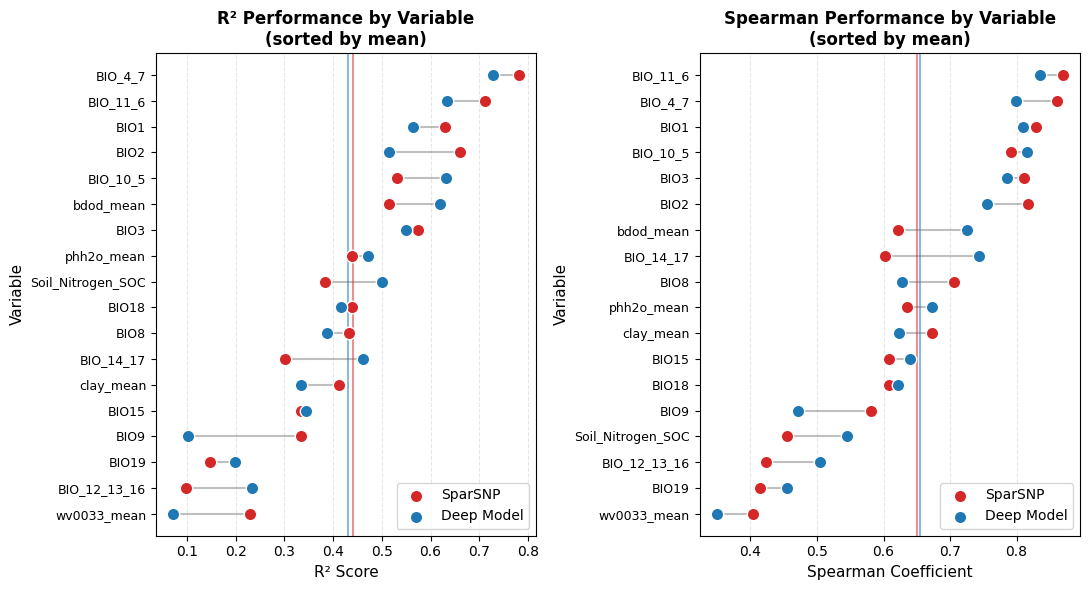


INTERPRETATION
• Each line connects the two model scores for one variable.
• Red points = SparSNP, Blue points = Deep Model.
• Dashed vertical lines show overall mean performance per model.
• Variables are sorted by mean performance (bottom = lower, top = higher).


In [119]:
# Visual comparison of model performance across variables
# Since we only have 2 models, create a dumbbell plot showing paired comparisons

import matplotlib.pyplot as plt
import numpy as np

# Prepare data sorted by mean performance
r2_combined = r2_data.copy()
r2_combined['mean'] = r2_combined.mean(axis=1)
r2_combined = r2_combined.sort_values('mean', ascending=True)

spearman_combined = spearman_data.copy()
spearman_combined['mean'] = spearman_combined.mean(axis=1)
spearman_combined = spearman_combined.sort_values('mean', ascending=True)

# Create side-by-side dumbbell plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

# R² dumbbell plot
y_pos = np.arange(len(r2_combined))
for i, (idx, row) in enumerate(r2_combined.iterrows()):
    sparsnp_val = row['SparSNP']
    deep_val = row['Deep_Model']
    ax1.plot([sparsnp_val, deep_val], [i, i], 'o-', color='gray', alpha=0.5, linewidth=1.5)
    
ax1.scatter(r2_combined['SparSNP'], y_pos, color='#d62728', s=80, label='SparSNP', zorder=3, edgecolor='white', linewidth=1)
ax1.scatter(r2_combined['Deep_Model'], y_pos, color='#1f77b4', s=80, label='Deep Model', zorder=3, edgecolor='white', linewidth=1)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(r2_combined.index, fontsize=9)
ax1.set_xlabel('R² Score', fontsize=11)
ax1.set_ylabel('Variable', fontsize=11)
ax1.set_title('R² Performance by Variable\n(sorted by mean)', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right', frameon=True, fontsize=10)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.axvline(r2_data['SparSNP'].mean(), color='#d62728', linestyle='-', alpha=0.5, linewidth=1.5, label='_nolegend_')
ax1.axvline(r2_data['Deep_Model'].mean(), color='#1f77b4', linestyle='-', alpha=0.5, linewidth=1.5, label='_nolegend_')

# Spearman dumbbell plot
y_pos2 = np.arange(len(spearman_combined))
for i, (idx, row) in enumerate(spearman_combined.iterrows()):
    sparsnp_val = row['SparSNP']
    deep_val = row['Deep_Model']
    ax2.plot([sparsnp_val, deep_val], [i, i], 'o-', color='gray', alpha=0.5, linewidth=1.5)

ax2.scatter(spearman_combined['SparSNP'], y_pos2, color='#d62728', s=80, label='SparSNP', zorder=3, edgecolor='white', linewidth=1)
ax2.scatter(spearman_combined['Deep_Model'], y_pos2, color='#1f77b4', s=80, label='Deep Model', zorder=3, edgecolor='white', linewidth=1)

ax2.set_yticks(y_pos2)
ax2.set_yticklabels(spearman_combined.index, fontsize=9)
ax2.set_xlabel('Spearman Coefficient', fontsize=11)
ax2.set_ylabel('Variable', fontsize=11)
ax2.set_title('Spearman Performance by Variable\n(sorted by mean)', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right', frameon=True, fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.axvline(spearman_data['SparSNP'].mean(), color='#d62728', linestyle='-', alpha=0.5, linewidth=1.5, label='_nolegend_')
ax2.axvline(spearman_data['Deep_Model'].mean(), color='#1f77b4', linestyle='-', alpha=0.5, linewidth=1.5, label='_nolegend_')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)
print("• Each line connects the two model scores for one variable.")
print("• Red points = SparSNP, Blue points = Deep Model.")
print("• Dashed vertical lines show overall mean performance per model.")
print("• Variables are sorted by mean performance (bottom = lower, top = higher).")

## Critical Difference Diagram: SparSNP vs ElasticNet Models

Friedman test with post-hoc Nemenyi comparing multiple model variants (ElasticNet, ElasticNet500, SparSNP_Base, SparSNP_100) across 18 environmental variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy import stats

# Load the SparSNP comparison data (contains multiple models)
r2_output_path = "Results/report_sparsnp_combined_r2_results.csv"
spearman_output_path = "Results/report_sparsnp_combined_spearman_results.csv"

r2_results = pd.read_csv(r2_output_path)
spearman_results = pd.read_csv(spearman_output_path)

# Extract model columns (exclude BIO_ID and Average)
models = [c for c in r2_results.columns if c not in ['BIO_ID', 'Average']]

# Extract model performance data (each row = one variable, columns = models)
r2_model_data = r2_results[models].copy()
spearman_model_data = spearman_results[models].copy()

# Set BIO_ID as index for clarity
r2_model_data.index = r2_results['BIO_ID']
spearman_model_data.index = spearman_results['BIO_ID']

print("\nR² data shape:", r2_model_data.shape)
print("Spearman data shape:", spearman_model_data.shape)
print("\nR² summary:")
print(r2_model_data.describe())
print("\nSpearman summary:")
print(spearman_model_data.describe())

Models to compare: ['ElasticNet', 'ElasticNet500', 'SparSNP_Base', 'SparSNP_100']
Number of variables: 18

R² data shape: (18, 4)
Spearman data shape: (18, 4)

R² summary:
       ElasticNet  ElasticNet500  SparSNP_Base  SparSNP_100
count   18.000000      18.000000     18.000000    18.000000
mean     0.386722       0.449000      0.416000     0.347778
std      0.193441       0.213977      0.238254     0.164893
min      0.037000       0.065000      0.051000     0.036000
25%      0.268750       0.311500      0.269000     0.258000
50%      0.365000       0.385500      0.335000     0.311500
75%      0.494500       0.648000      0.557000     0.485750
max      0.757000       0.807000      0.830000     0.566000

Spearman summary:
       ElasticNet  ElasticNet500  SparSNP_Base  SparSNP_100
count   18.000000      18.000000     18.000000    18.000000
mean     0.618556       0.682444      0.621722     0.584778
std      0.133119       0.123184      0.193136     0.151229
min      0.362000       0.436

In [121]:
# Friedman test (non-parametric ANOVA for repeated measures)
# H0: All models have the same distribution of ranks across variables

# R² Friedman test
r2_values_list = [r2_model_data[col].values for col in models]
friedman_r2 = stats.friedmanchisquare(*r2_values_list)
print("=" * 70)
print("R² COEFFICIENT COMPARISON - FRIEDMAN TEST")
print("=" * 70)
print(f"Friedman test statistic: {friedman_r2.statistic:.4f}")
print(f"Friedman test p-value: {friedman_r2.pvalue:.6f}")
if friedman_r2.pvalue < 0.05:
    print("→ Significant difference between models (p < 0.05)")
    print("  Proceeding with post-hoc Nemenyi test...")
else:
    print("→ No significant difference between models (p ≥ 0.05)")

# Spearman Friedman test
spearman_values_list = [spearman_model_data[col].values for col in models]
friedman_s = stats.friedmanchisquare(*spearman_values_list)
print("\n" + "=" * 70)
print("SPEARMAN COEFFICIENT COMPARISON - FRIEDMAN TEST")
print("=" * 70)
print(f"Friedman test statistic: {friedman_s.statistic:.4f}")
print(f"Friedman test p-value: {friedman_s.pvalue:.6f}")
if friedman_s.pvalue < 0.05:
    print("→ Significant difference between models (p < 0.05)")
    print("  Proceeding with post-hoc Nemenyi test...")
else:
    print("→ No significant difference between models (p ≥ 0.05)")

# Compute average ranks for each model (lower rank = better performance)
print("\n" + "=" * 70)
print("AVERAGE RANKS (lower rank = better performance)")
print("=" * 70)
r2_ranks = r2_model_data.rank(axis=1, ascending=False).mean()
s_ranks = spearman_model_data.rank(axis=1, ascending=False).mean()
print("\nR² average ranks:")
print(r2_ranks.sort_values())
print("\nSpearman average ranks:")
print(s_ranks.sort_values())

# Compute mean performance for each model
print("\n" + "=" * 70)
print("MEAN PERFORMANCE ACROSS VARIABLES")
print("=" * 70)
print("\nR² means:")
for model in models:
    mean_val = r2_model_data[model].mean()
    std_val = r2_model_data[model].std()
    print(f"  {model:20s}: {mean_val:.4f} ± {std_val:.4f}")

print("\nSpearman means:")
for model in models:
    mean_val = spearman_model_data[model].mean()
    std_val = spearman_model_data[model].std()
    print(f"  {model:20s}: {mean_val:.4f} ± {std_val:.4f}")

R² COEFFICIENT COMPARISON - FRIEDMAN TEST
Friedman test statistic: 16.6667
Friedman test p-value: 0.000828
→ Significant difference between models (p < 0.05)
  Proceeding with post-hoc Nemenyi test...

SPEARMAN COEFFICIENT COMPARISON - FRIEDMAN TEST
Friedman test statistic: 25.1333
Friedman test p-value: 0.000014
→ Significant difference between models (p < 0.05)
  Proceeding with post-hoc Nemenyi test...

AVERAGE RANKS (lower rank = better performance)

R² average ranks:
ElasticNet500    1.666667
SparSNP_Base     2.222222
ElasticNet       2.777778
SparSNP_100      3.333333
dtype: float64

Spearman average ranks:
ElasticNet500    1.388889
SparSNP_Base     2.277778
ElasticNet       2.888889
SparSNP_100      3.444444
dtype: float64

MEAN PERFORMANCE ACROSS VARIABLES

R² means:
  ElasticNet          : 0.3867 ± 0.1934
  ElasticNet500       : 0.4490 ± 0.2140
  SparSNP_Base        : 0.4160 ± 0.2383
  SparSNP_100         : 0.3478 ± 0.1649

Spearman means:
  ElasticNet          : 0.6186 ± 0.13

R² data structure (first 12 rows):
    variable_id                   model     r2
0             0  Elastic Net (100 SNPs)  0.730
1             1  Elastic Net (100 SNPs)  0.757
2             2  Elastic Net (100 SNPs)  0.617
3             3  Elastic Net (100 SNPs)  0.516
4             4  Elastic Net (100 SNPs)  0.572
5             5  Elastic Net (100 SNPs)  0.422
6             6  Elastic Net (100 SNPs)  0.376
7             7  Elastic Net (100 SNPs)  0.430
8             8  Elastic Net (100 SNPs)  0.391
9             9  Elastic Net (100 SNPs)  0.314
10           10  Elastic Net (100 SNPs)  0.307
11           11  Elastic Net (100 SNPs)  0.307

Shape: (72, 3)
Unique variable_ids: 18
Models: ['Elastic Net (100 SNPs)' 'Elastic Net (500 SNPs)' 'SparSNP (All SNPs)'
 'SparSNP (100 SNPs)']

R² average ranks (1 = best):
model
Elastic Net (500 SNPs)    1.666667
SparSNP (All SNPs)        2.222222
Elastic Net (100 SNPs)    2.777778
SparSNP (100 SNPs)        3.333333
Name: r2, dtype: float64

Spearman 

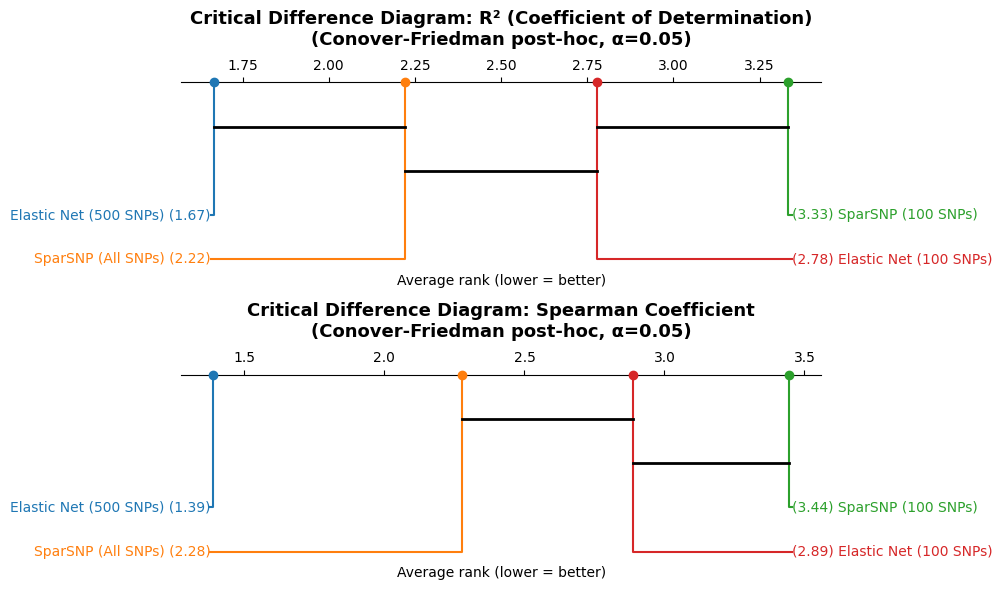


INTERPRETATION
• Models connected by a horizontal bar are NOT significantly different (p ≥ 0.05).
• Models not connected have significantly different performance ranks (p < 0.05).
• Values in parentheses are average ranks (lower = better).
• Models ordered left-to-right by rank (higher = worse, lower = better).


In [137]:
# Post-hoc Conover-Friedman test and Critical Difference Diagrams
# Following the scikit-posthocs tutorial approach

# Prepare melted data (long format) exactly like the tutorial
# The tutorial does: DataFrame.rename_axis('cv_fold').melt(..., ignore_index=False).reset_index()
# The key is that the DataFrame index must be numeric (0, 1, 2, ...) representing the blocks

# Reset index to get numeric 0-17 instead of BIO_ID strings
r2_numeric = r2_model_data.reset_index(drop=True)
spearman_numeric = spearman_model_data.reset_index(drop=True)

# Now follow tutorial pattern exactly
r2_long = (r2_numeric
           .rename_axis('variable_id')  # Name the numeric index
           .melt(var_name='model', value_name='r2', ignore_index=False)
           .reset_index()  # Brings variable_id as a column (will be 0-17)
          )

spearman_long = (spearman_numeric
                 .rename_axis('variable_id')
                 .melt(var_name='model', value_name='spearman', ignore_index=False)
                 .reset_index()
                )

# Rename model labels to be more descriptive
model_name_map = {
    'SparSNP_100': 'SparSNP (100 SNPs)',
    'SparSNP_Base': 'SparSNP (All SNPs)',
    'ElasticNet': 'Elastic Net (100 SNPs)',
    'ElasticNet500': 'Elastic Net (500 SNPs)'
}

r2_long['model'] = r2_long['model'].map(model_name_map)
spearman_long['model'] = spearman_long['model'].map(model_name_map)

print("R² data structure (first 12 rows):")
print(r2_long.head(12))
print(f"\nShape: {r2_long.shape}")
print(f"Unique variable_ids: {r2_long['variable_id'].nunique()}")
print(f"Models: {r2_long['model'].unique()}")

# Calculate average ranks per model using actual ranks 1..K (lower = better)
# Rank within each variable_id: best (highest metric) gets 1
r2_avg_rank = (r2_long.groupby('variable_id')['r2']
               .rank(method='average', ascending=False)
               .groupby(r2_long['model'])
               .mean()
               .sort_values())

spearman_avg_rank = (spearman_long.groupby('variable_id')['spearman']
                     .rank(method='average', ascending=False)
                     .groupby(spearman_long['model'])
                     .mean()
                     .sort_values())

print("\nR² average ranks (1 = best):")
print(r2_avg_rank)
print("\nSpearman average ranks (1 = best):")
print(spearman_avg_rank)

# Conover-Friedman post-hoc test for R²
# In melted format, variable_id appears once per model, so we need block_id_col
r2_posthoc = sp.posthoc_conover_friedman(
    r2_long,
    melted=True,
    block_col='variable_id',    # blocking factor (0-17)
    block_id_col='variable_id',  # same as block_col since variable_id uniquely identifies blocks
    group_col='model',          # groups to compare
    y_col='r2',                 # response variable
    p_adjust='holm'             # adjust p-values for multiple comparisons
)
print("\nR² Conover-Friedman post-hoc test (p-values):")
print(r2_posthoc.round(4))

# Conover-Friedman post-hoc test for Spearman
spearman_posthoc = sp.posthoc_conover_friedman(
    spearman_long,
    melted=True,
    block_col='variable_id',
    block_id_col='variable_id',
    group_col='model',
    y_col='spearman',
    p_adjust='holm'             # adjust p-values for multiple comparisons
)
print("\nSpearman Conover-Friedman post-hoc test (p-values):")
print(spearman_posthoc.round(4))

# Critical Difference Diagrams on a single figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Top subplot: R² (Coefficient of Determination)
sp.critical_difference_diagram(
    ranks=r2_avg_rank,
    sig_matrix=r2_posthoc,
    ax=axs[0],
    label_fmt_left='{label} ({rank:.2f})',
    label_fmt_right='({rank:.2f}) {label}',
)
axs[0].set_title('Critical Difference Diagram: R² (Coefficient of Determination)\n(Conover-Friedman post-hoc, α=0.05)', 
                 fontsize=13, pad=10, fontweight='bold')
axs[0].set_xlabel('Average rank (lower = better)')

# Bottom subplot: Spearman
sp.critical_difference_diagram(
    ranks=spearman_avg_rank,
    sig_matrix=spearman_posthoc,
    ax=axs[1],
    label_fmt_left='{label} ({rank:.2f})',
    label_fmt_right='({rank:.2f}) {label}',
)
axs[1].set_title('Critical Difference Diagram: Spearman Coefficient\n(Conover-Friedman post-hoc, α=0.05)', 
                 fontsize=13, pad=10, fontweight='bold')
axs[1].set_xlabel('Average rank (lower = better)')

# Improve spacing between subplots for visual separation
plt.subplots_adjust(hspace=0.35)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("INTERPRETATION")
print("=" * 70)
print("• Models connected by a horizontal bar are NOT significantly different (p ≥ 0.05).")
print("• Models not connected have significantly different performance ranks (p < 0.05).")
print("• Values in parentheses are average ranks (lower = better).")
print("• Models ordered left-to-right by rank (higher = worse, lower = better).")

### Note: Combined critical difference diagrams
The two critical difference diagrams (R² and Spearman) are now rendered on a single figure using two stacked subplots. 

- Adjust `figsize` in `plt.subplots(2, 1, figsize=(10, 6))` to change overall size.
- To place them side-by-side instead, change to `plt.subplots(1, 2, figsize=(14, 3))` and keep the rest the same (`axs[0]` and `axs[1]`).
- Use `plt.tight_layout()` or `constrained_layout=True` in `plt.subplots` for spacing if needed.